In [1]:
#imports to prepare environment

# ignore warnings
import warnings
warnings.filterwarnings("ignore")

# Wrangling
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

# Statistical Tests
import scipy.stats as stats

# Visualizing
import matplotlib.pyplot as plt
from matplotlib import cm
import seaborn as sns
from sklearn.model_selection import learning_curve
from kmodes.kmodes import KModes

#wrangle files
import wrangle


pd.options.display.float_format = '{:20,.2f}'.format

In [2]:
#checking the wrangle.py file 
df = wrangle.acquire_prep()
df.head(3)

,zodiac,race,age,sex,sexornt,marital,res16,reg16,degree,income,...,socbar,socrel,socommun,socfrend,satsoc,class,satfin,quallife,partners,partnrs5
0,pisces,white,65.00,female,heterosexual or straight,married,"in a medium-size city (50,000-250,000)",new england,high school,unknown,...,unknown,unknown,unknown,unknown,fair,middle class,more or less satisfied,good,1 partner,1 partner
1,pisces,white,60.00,male,unknown,divorced,"in a large city (over 250,000)",pacific,bachelor's,refused,...,several times a month,several times a year,once or twice a week,several times a month,very good,upper class,pretty well satisfied,excellent,unknown,unknown
5,aries,black,33.00,female,unknown,never married,"in a small city or town (under 50,000)",new england,bachelor's,unknown,...,about once a month,about once a month,about once a month,about once a month,good,middle class,pretty well satisfied,good,unknown,unknown


In [3]:
df.age.value_counts().index

Float64Index([67.0, 33.0, 52.0, 59.0, 57.0, 42.0, 61.0, 63.0, 62.0, 41.0, 37.0,
              68.0, 60.0, 70.0, 69.0, 51.0, 34.0, 65.0, 74.0, 53.0, 64.0, 39.0,
              55.0, 29.0, 40.0, 35.0, 46.0, 44.0, 36.0, 30.0, 58.0, 56.0, 38.0,
              32.0, 28.0, 66.0, 75.0, 71.0, 31.0, 43.0, 47.0, 49.0, 54.0, 72.0,
              50.0, 45.0, 73.0, 48.0, 25.0, 26.0, 79.0, 24.0, 77.0, 27.0, 76.0,
              78.0, 81.0, 22.0, 23.0, 80.0, 89.0, 21.0, 84.0, 20.0, 83.0, 82.0,
              85.0, 19.0, 86.0, 87.0, 88.0, 18.0],
             dtype='float64')

In [4]:
#bringing in split function and looking at the shape of data:
train, validate, test = wrangle.split(df)

Train: 2499 rows, 66 cols
Validate: 625 rows, 66 cols
Test: 552 rows, 66 cols


In [5]:
# Count of observations in the data
print(pd.Series({"Number of observations in the training set": len(train),
                 "Number of observations in the test set": len(test)}).to_string())

Number of observations in the training set    2499
Number of observations in the test set         552


In [6]:
# Number of unique values in the training set columns
train.nunique()

zodiac      12
race         4
age         72
sex          3
sexornt      4
            ..
class        5
satfin       4
quallife     6
partners    10
partnrs5    11
Length: 66, dtype: int64

### Creating some visuals of data:

In [7]:
#creating some groups to view of data:
train_demo = train[['zodiac','race','age','sex','sexornt']]

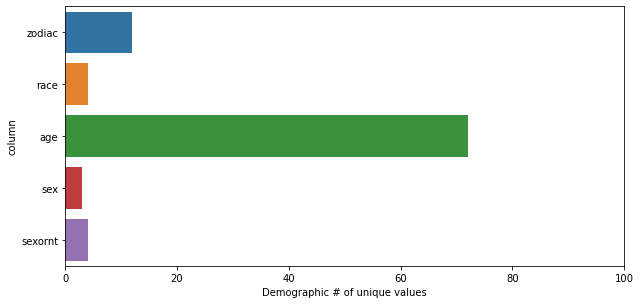

In [8]:
# Number of unique values in the training set columns by count
plt.figure(figsize = (9, 13 / 3))
train_view = train_demo.nunique()
s = sns.barplot(x = train_view.values, y = train_view.index)
s.set_xlim(0, 100)
# s.bar_label(s.containers[0])
s.set(xlabel = "Demographic # of unique values", ylabel = "column")
plt.tight_layout()
plt.show()

In [9]:
#group by relationships/family
train_rel = train[['marital','res16','reg16','class']]

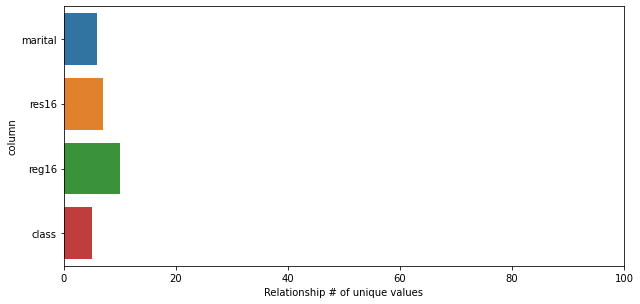

In [10]:
# Number of unique values in the training set columns by count
plt.figure(figsize = (9, 13 / 3))
train_view2 = train_rel.nunique()
s = sns.barplot(x = train_view2.values, y = train_view2.index)
s.set_xlim(0, 100)
# s.bar_label(s.containers[0])
s.set(xlabel = "Relationship # of unique values", ylabel = "column")
plt.tight_layout()
plt.show()

Interesting to note that for mother and father occupations, there are the most unique counts

In [11]:
#group by work and career
train_work = train[['income','wrkslf','satjob','occ10','degree']]

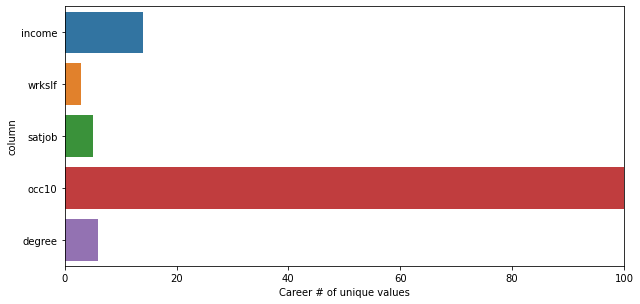

In [12]:
# Number of unique values in the training set columns by count
plt.figure(figsize = (9, 13 / 3))
train_view3 = train_work.nunique()
s = sns.barplot(x = train_view3.values, y = train_view3.index)
s.set_xlim(0, 100)
# s.bar_label(s.containers[0])
s.set(xlabel = "Career # of unique values", ylabel = "column")
plt.tight_layout()
plt.show()

In [13]:
#group by religion and spiritual
train_sprt = train[['relig','postlifev','postlifenv','sprtprsn','sprtconnct',
                    'sprtlrgr','sprtpurp'
                   ]]

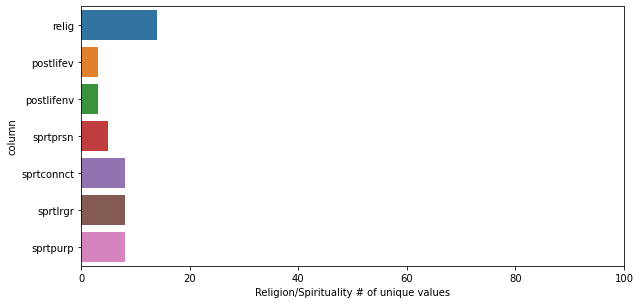

In [14]:
# Number of unique values in the training set columns by count
plt.figure(figsize = (9, 13 / 3))
train_view4 = train_sprt.nunique()
s = sns.barplot(x = train_view4.values, y = train_view4.index)
s.set_xlim(0, 100)
# s.bar_label(s.containers[0])
s.set(xlabel = "Religion/Spirituality # of unique values", ylabel = "column")
plt.tight_layout()
plt.show()

In [15]:
#group by opinions
train_opin = train[['fairv','fairnv','helpfulv','helpfulnv','trustv','trustnv',
                    'conmedic','contv','conpress','consci','conjudge','conlegis','happy',
                    'life','obey','popular','thnkself','workhard','helpoth','grtwrks','freemind'
                   ]]

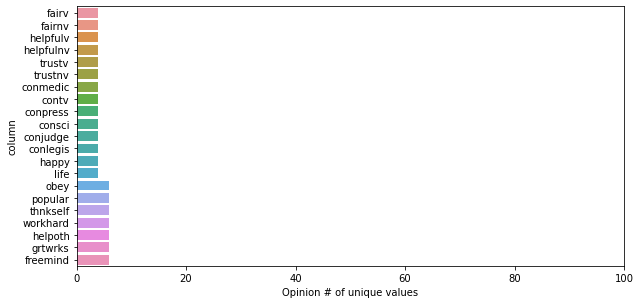

In [16]:
# Number of unique values in the training set columns by count
plt.figure(figsize = (9, 13 / 3))
train_view5 = train_opin.nunique()
s = sns.barplot(x = train_view5.values, y = train_view5.index)
s.set_xlim(0, 100)
# s.bar_label(s.containers[0])
s.set(xlabel = "Opinion # of unique values", ylabel = "column")
plt.tight_layout()
plt.show()

In [17]:
#reminder of column names for reference:
train.columns

Index(['zodiac', 'race', 'age', 'sex', 'sexornt', 'marital', 'res16', 'reg16',
       'degree', 'income', 'wrkslf', 'satjob', 'occ10', 'partyid', 'if16who',
       'polviews', 'gunlaw', 'grassv', 'relig', 'postlifev', 'postlifenv',
       'sprtprsn', 'sprtconnct', 'sprtlrgr', 'sprtpurp', 'happy', 'life',
       'obey', 'popular', 'thnkself', 'workhard', 'helpoth', 'grtwrks',
       'freemind', 'decevidc', 'advfmsci', 'mditate1', 'health', 'hlthphys',
       'hlthmntl', 'enjoynat', 'eatmeat', 'recycle', 'nobuygrn', 'fairv',
       'fairnv', 'helpfulv', 'helpfulnv', 'trustv', 'trustnv', 'conmedic',
       'contv', 'conpress', 'consci', 'conjudge', 'conlegis', 'socbar',
       'socrel', 'socommun', 'socfrend', 'satsoc', 'class', 'satfin',
       'quallife', 'partners', 'partnrs5'],
      dtype='object')

Zodiac Count:

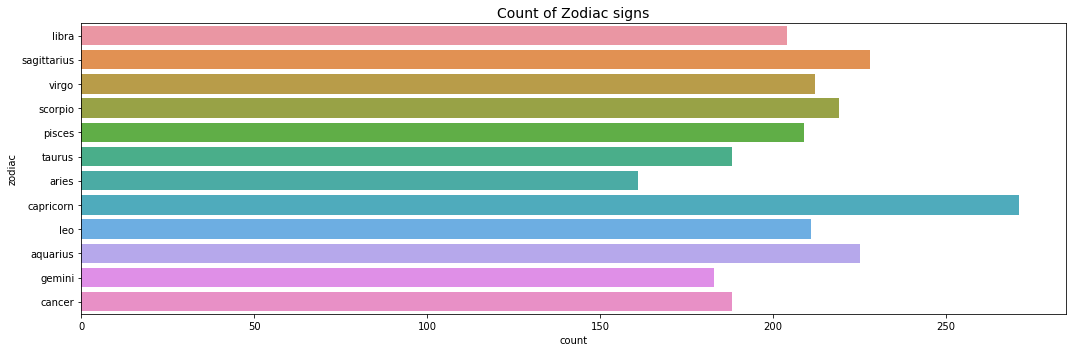

In [18]:
plt.figure(figsize = (15,  5))
sns.countplot(data = train, y = 'zodiac')
plt.title(f"Count of Zodiac signs", fontsize = 14)
plt.tight_layout()
plt.show()

Relationship Status:

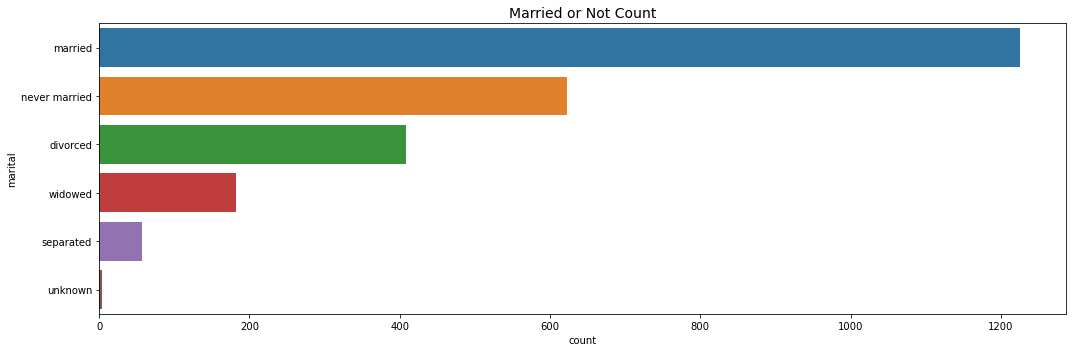

In [19]:
plt.figure(figsize = (15,  5))
sns.countplot(data = train, y = 'marital')
plt.title(f"Married or Not Count", fontsize = 14)
plt.tight_layout()
plt.show()

Gender:

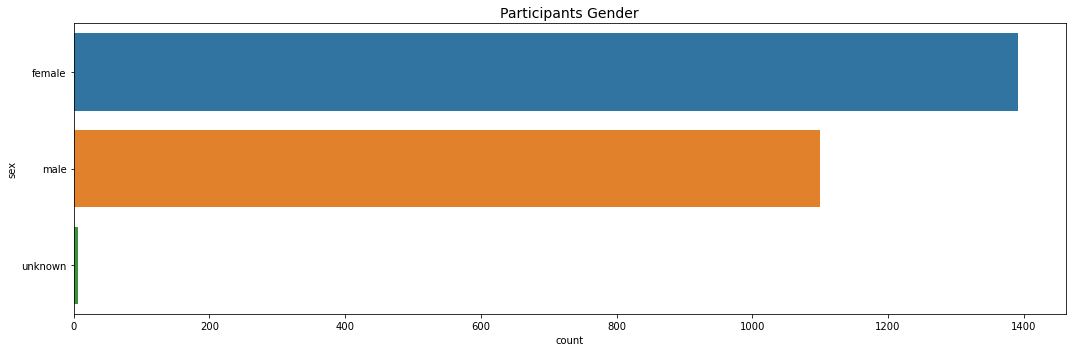

In [20]:
plt.figure(figsize = (15,  5))
sns.countplot(data = train, y = 'sex')
plt.title(f"Participants Gender", fontsize = 14)
plt.tight_layout()
plt.show()

Sexual Orientation:

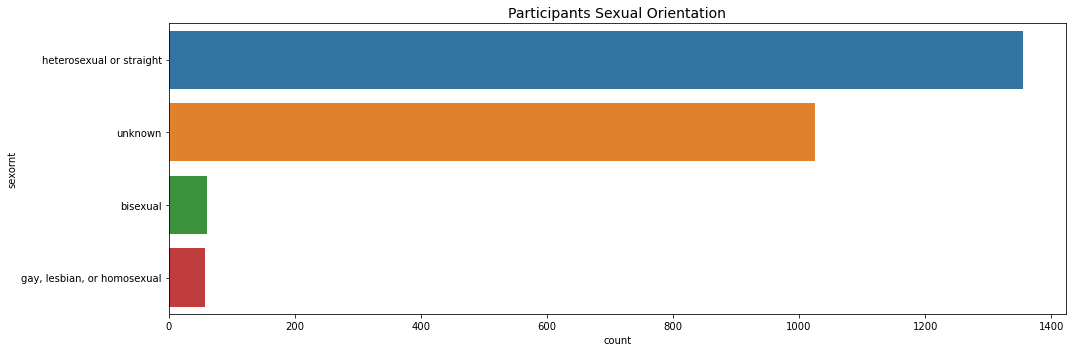

In [21]:
plt.figure(figsize = (15,  5))
sns.countplot(data = train, y = 'sexornt')
plt.title(f"Participants Sexual Orientation", fontsize = 14)
plt.tight_layout()
plt.show()

Age of Participants: NOTE-will be making bins for this one!

In [22]:
# Number of unique values in the training set columns by count
train.age.describe()

count               2,499.00
mean                   52.13
std                    17.20
min                    18.00
25%                    38.00
50%                    52.00
75%                    66.00
max                    89.00
Name: age, dtype: float64

In [23]:
train.age.value_counts().index

Float64Index([67.0, 52.0, 42.0, 57.0, 33.0, 59.0, 69.0, 60.0, 63.0, 61.0, 68.0,
              55.0, 56.0, 62.0, 40.0, 64.0, 37.0, 46.0, 74.0, 34.0, 41.0, 51.0,
              65.0, 39.0, 70.0, 29.0, 28.0, 31.0, 32.0, 75.0, 44.0, 50.0, 36.0,
              58.0, 30.0, 45.0, 47.0, 49.0, 43.0, 35.0, 71.0, 38.0, 53.0, 72.0,
              66.0, 73.0, 54.0, 25.0, 48.0, 26.0, 79.0, 24.0, 27.0, 22.0, 23.0,
              77.0, 78.0, 89.0, 76.0, 81.0, 80.0, 20.0, 85.0, 83.0, 82.0, 21.0,
              84.0, 19.0, 86.0, 87.0, 88.0, 18.0],
             dtype='float64')

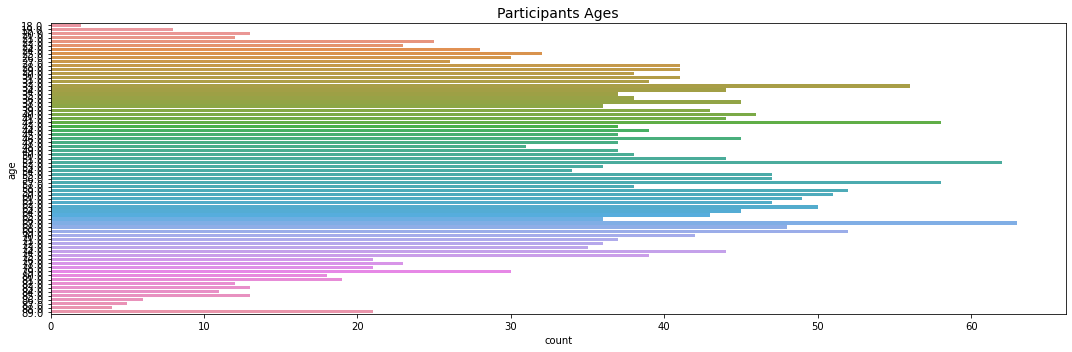

In [24]:
plt.figure(figsize = (15,  5))
sns.countplot(data = train, y = 'age')
plt.title(f"Participants Ages", fontsize = 14)
plt.tight_layout()
plt.show()

Religion of Participants:

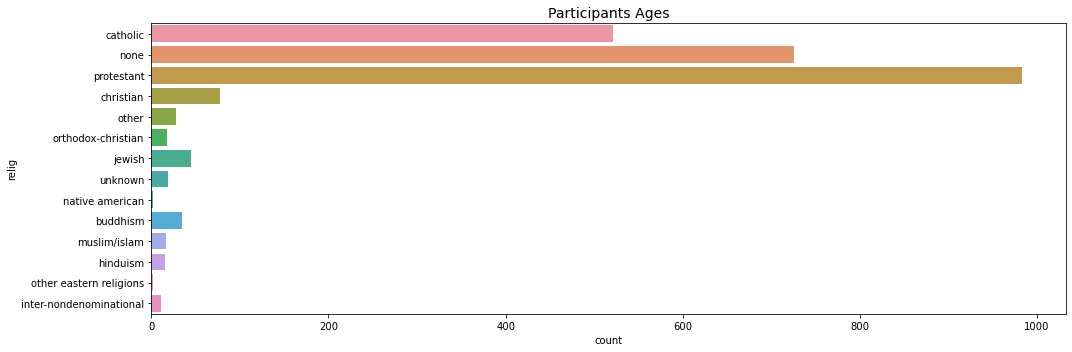

In [25]:
plt.figure(figsize = (15,  5))
sns.countplot(data = train, y = 'relig')
plt.title(f"Participants Ages", fontsize = 14)
plt.tight_layout()
plt.show()

Creating a loop function to iterate this for each variable:

In [26]:
def variable_count(df):
    columns = df.columns
    for col in columns:
        plt.figure(figsize = (15,  5))
        sns.countplot(data = df, y = col)
        plt.tight_layout()
        plt.show()

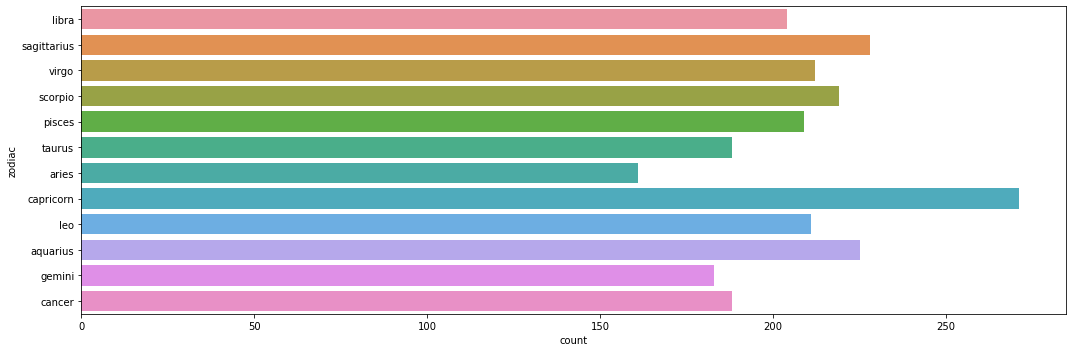

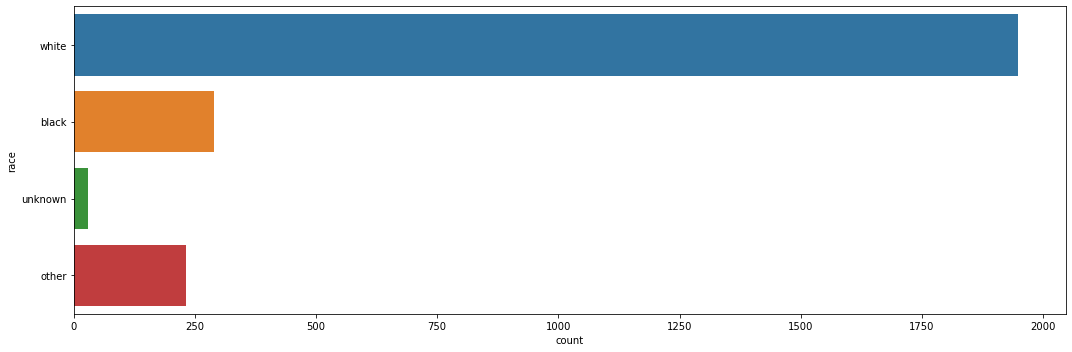

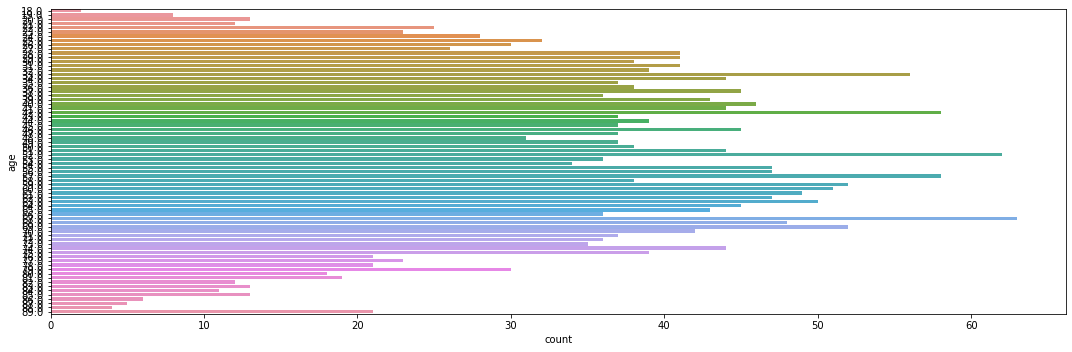

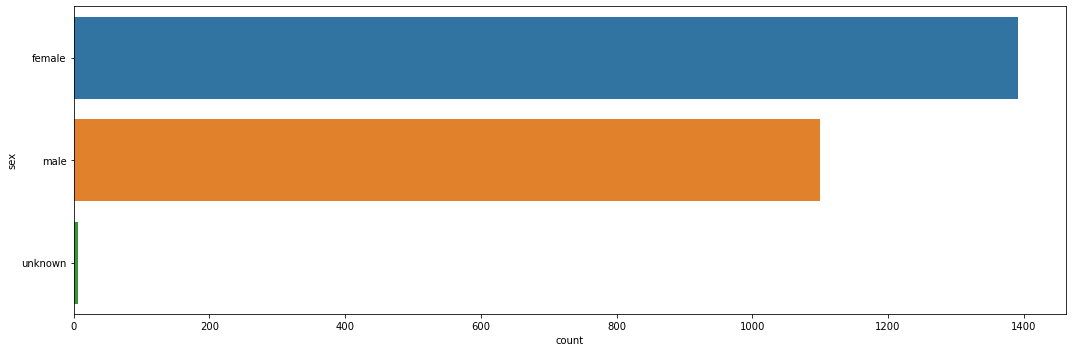

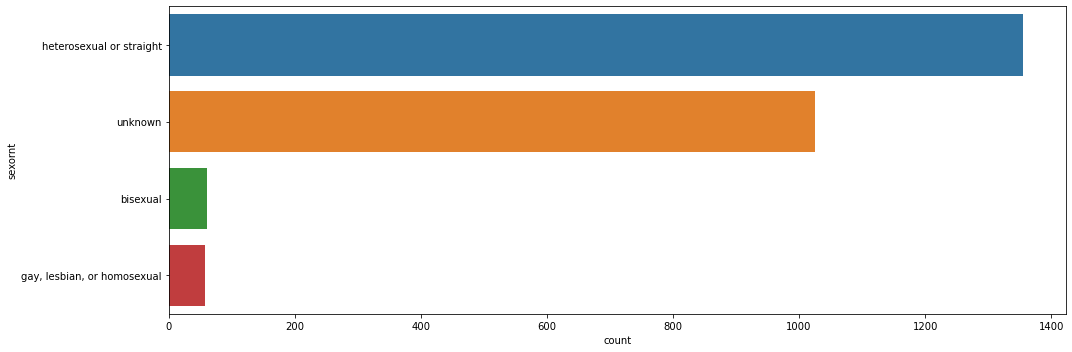

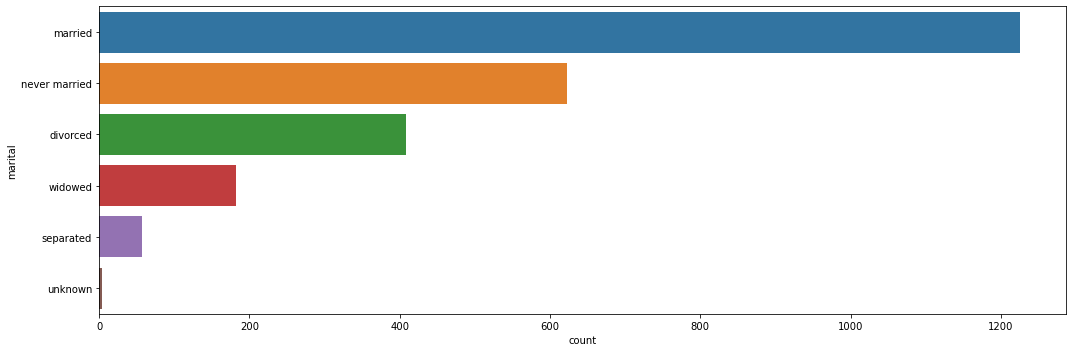

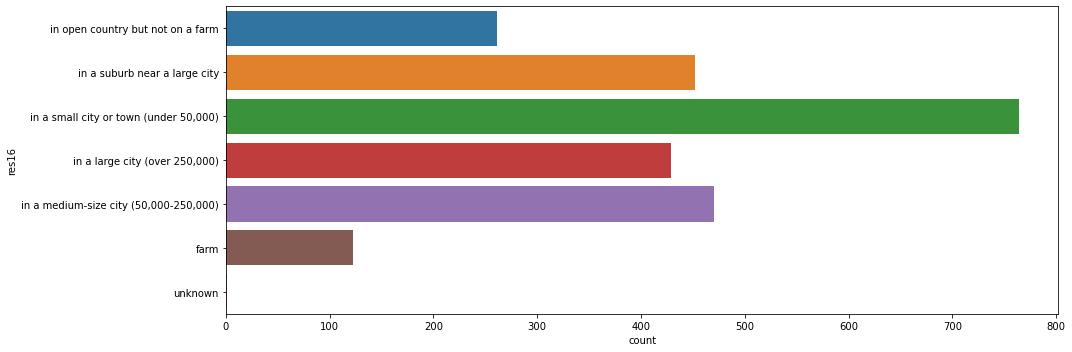

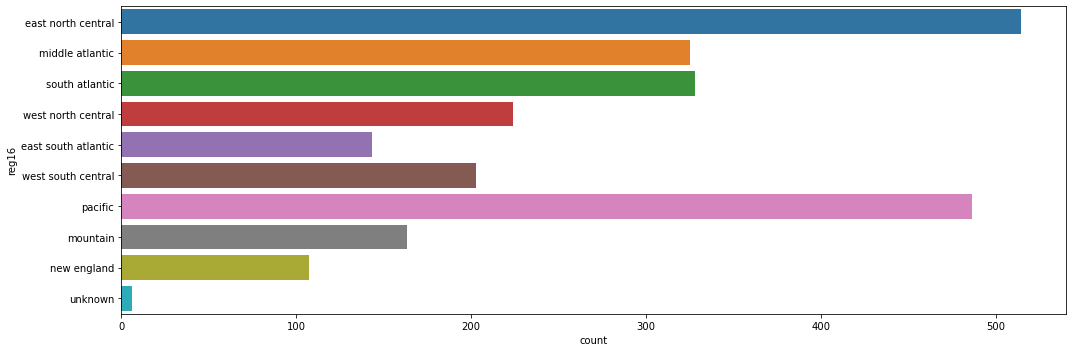

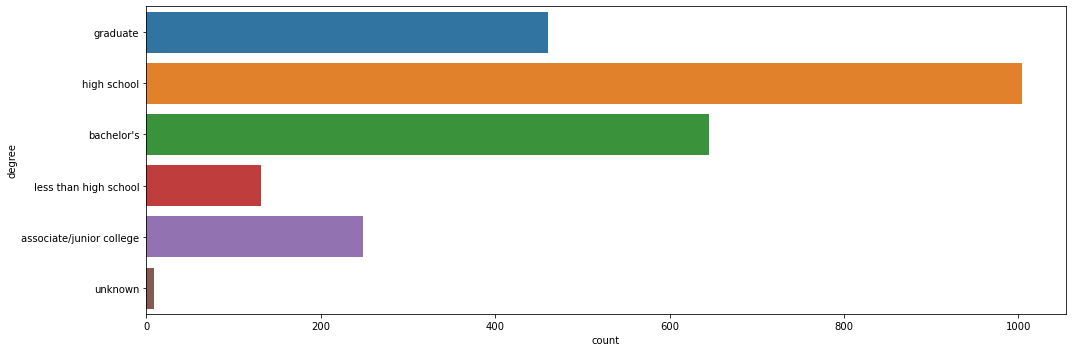

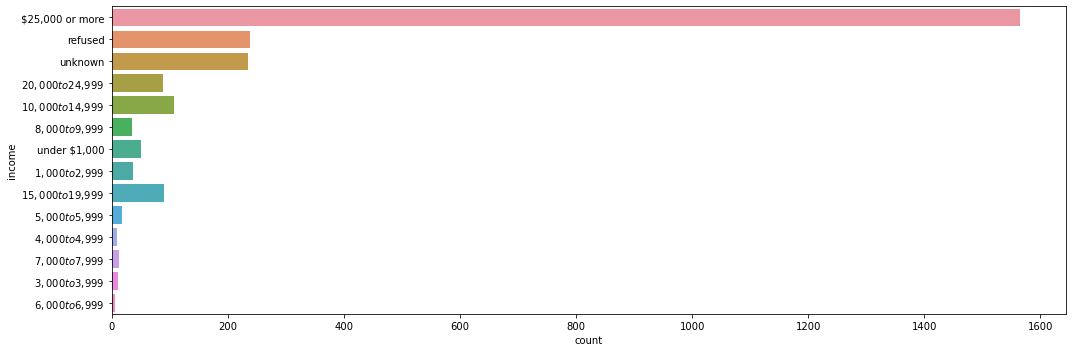

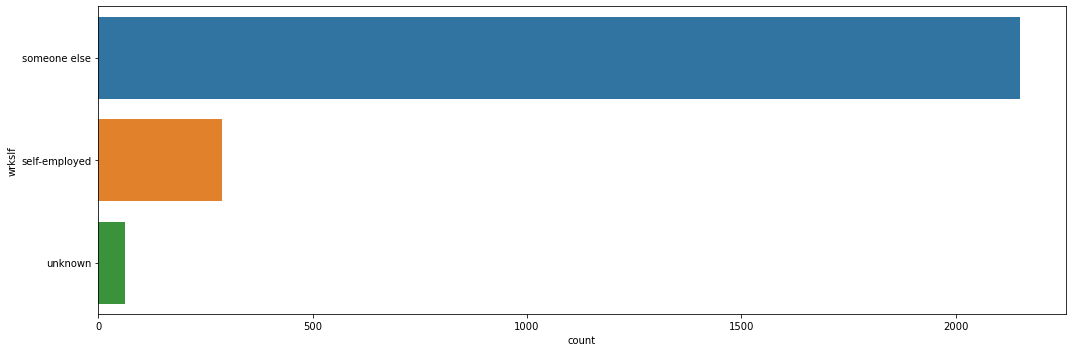

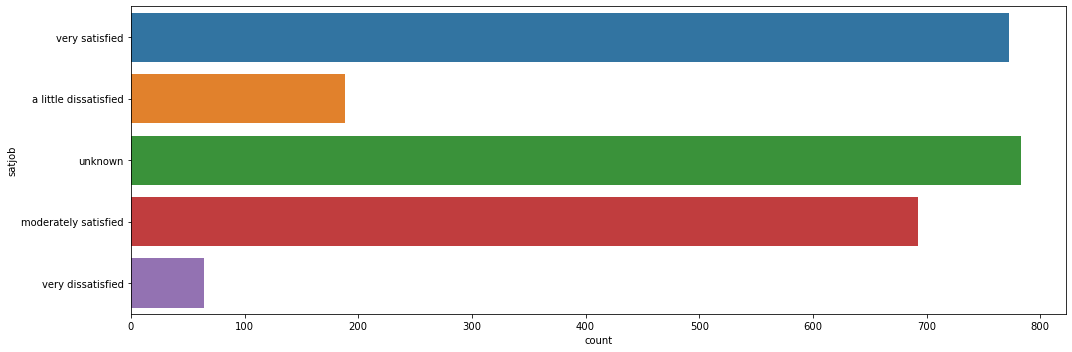

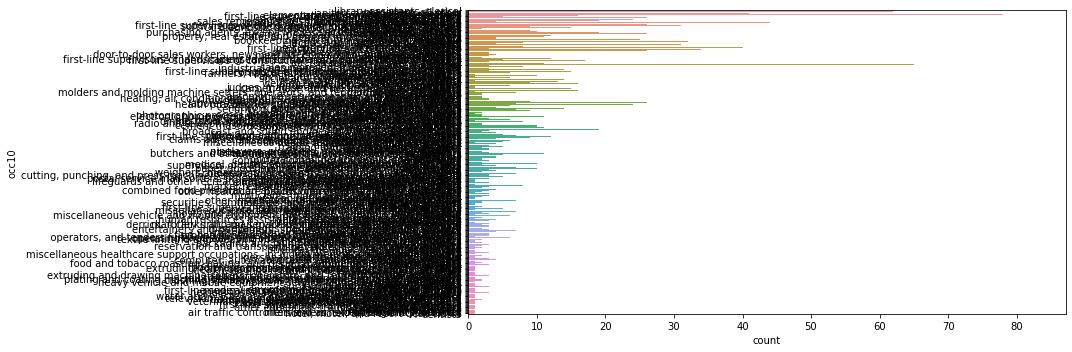

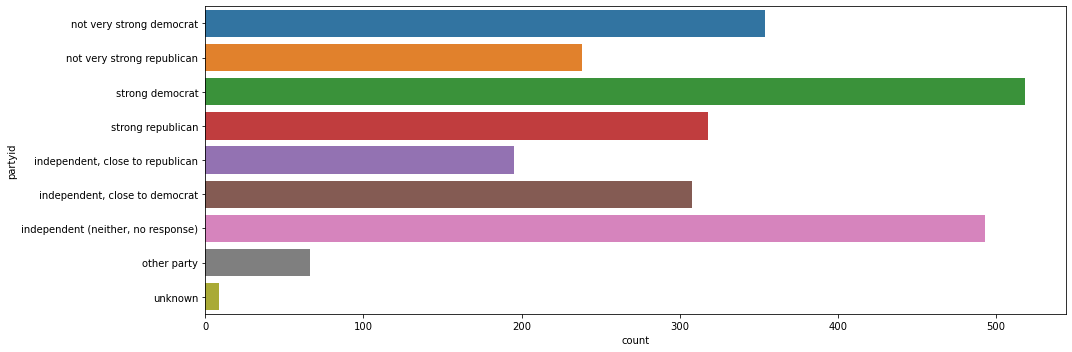

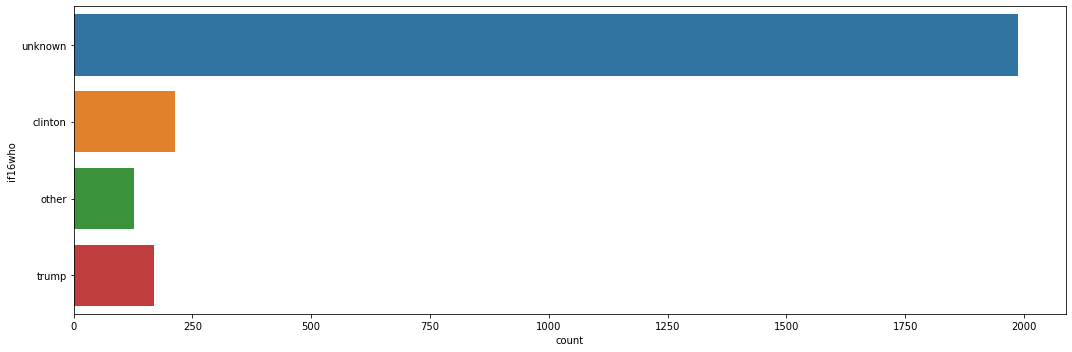

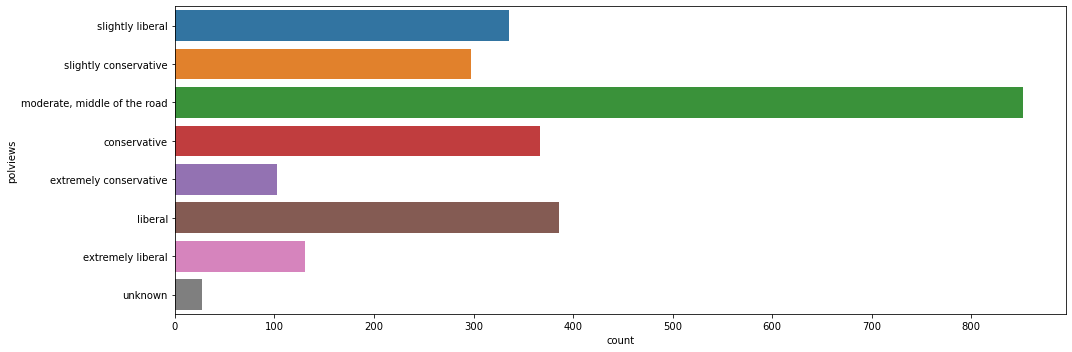

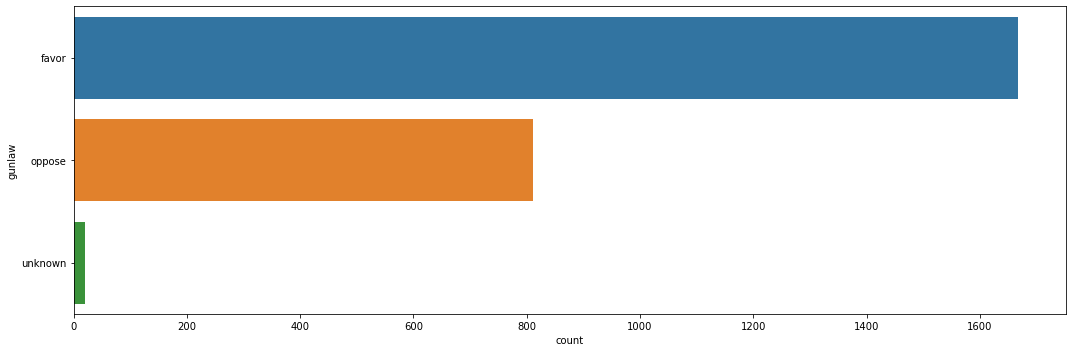

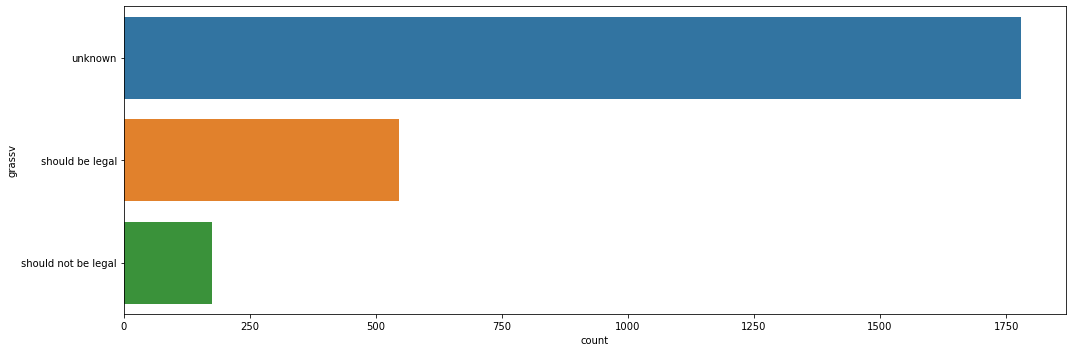

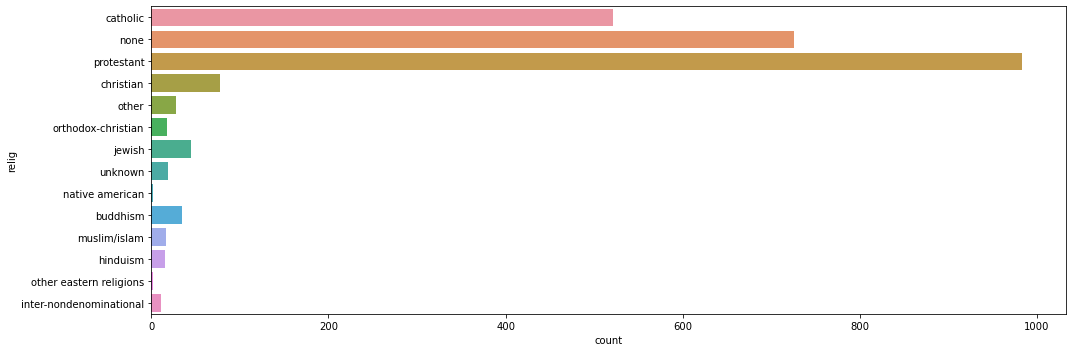

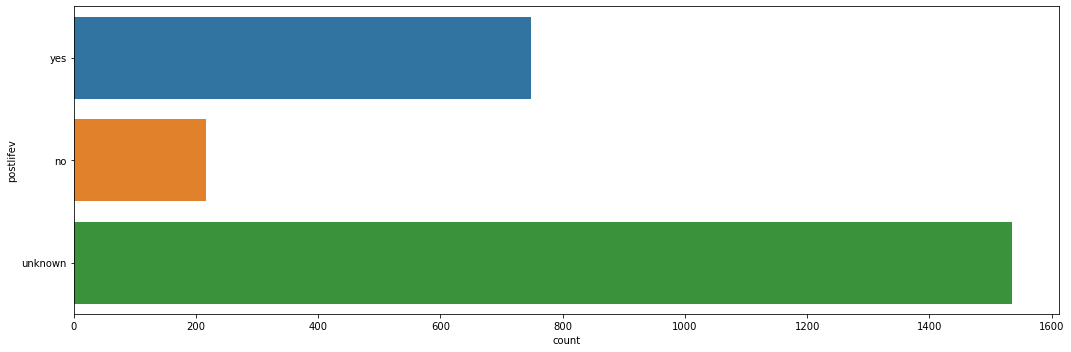

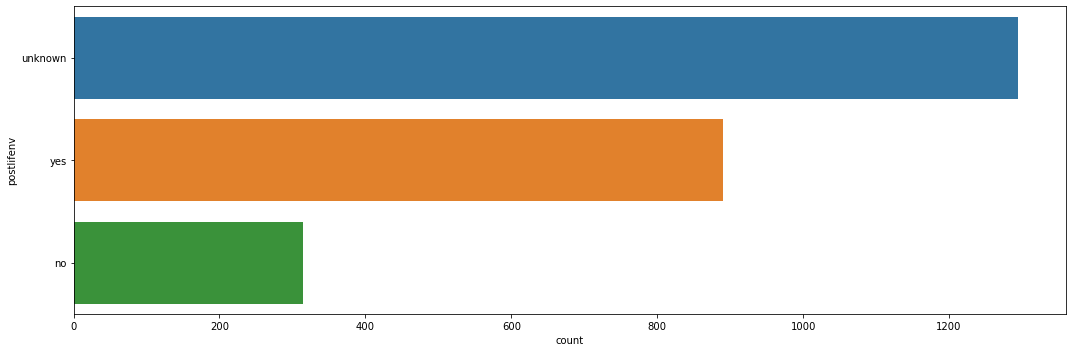

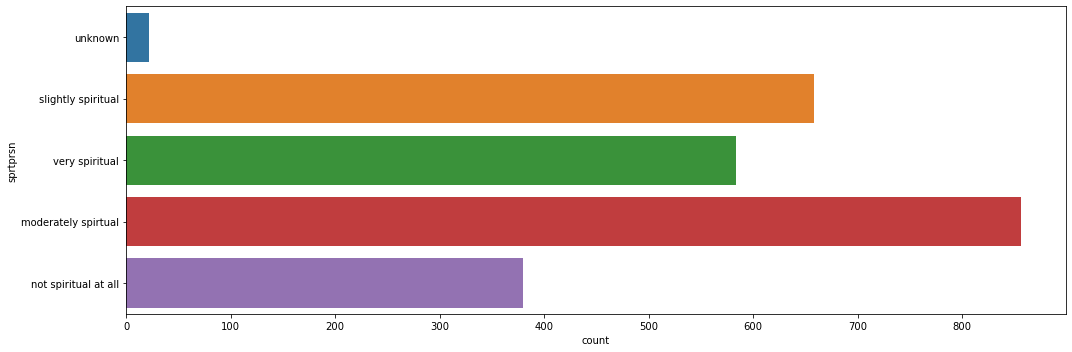

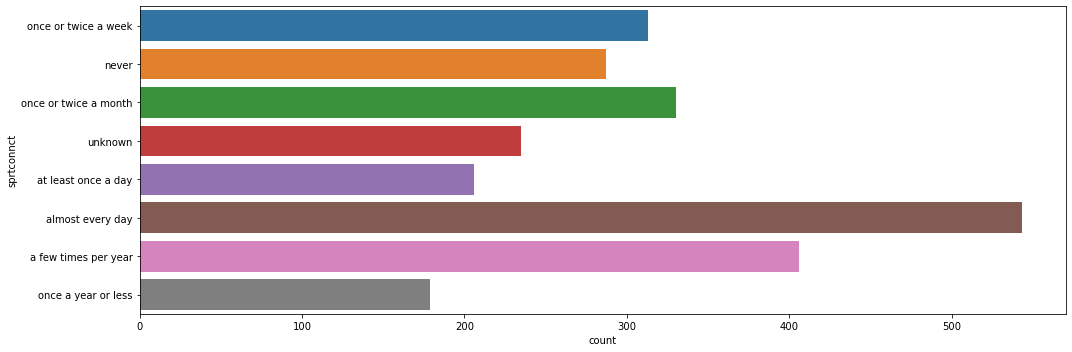

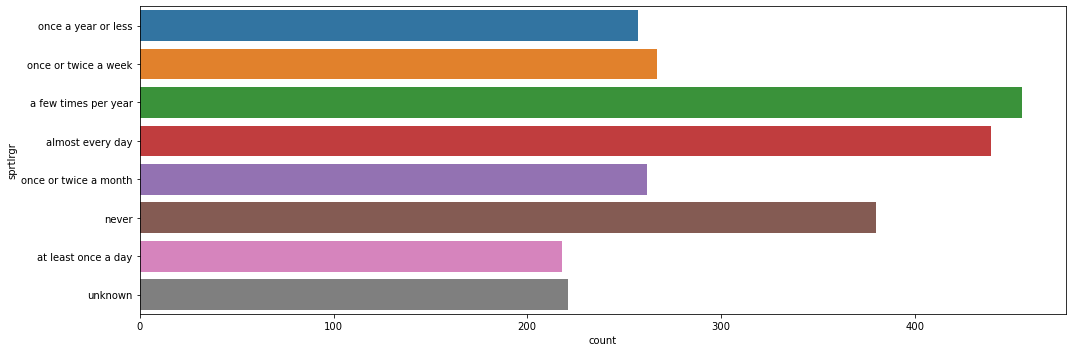

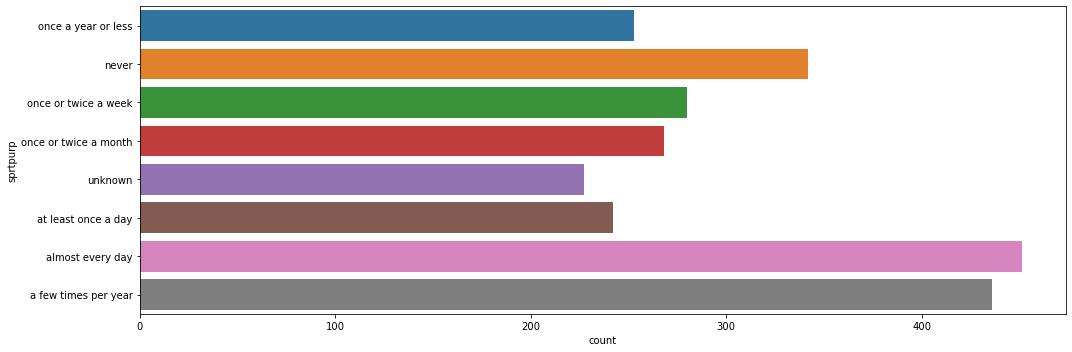

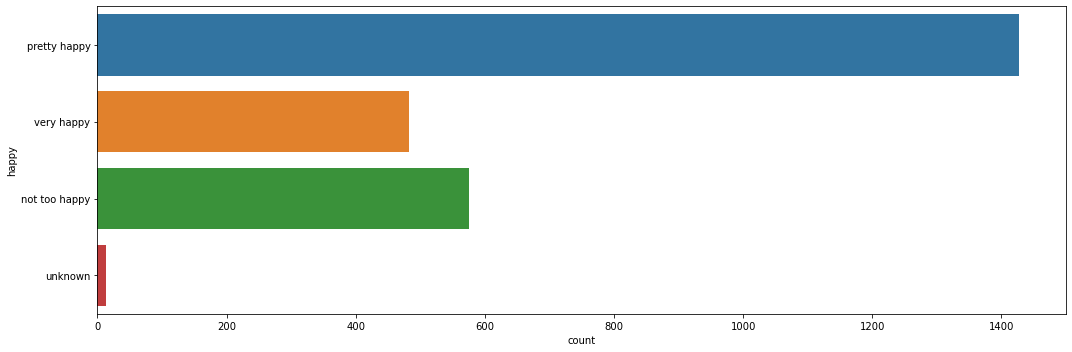

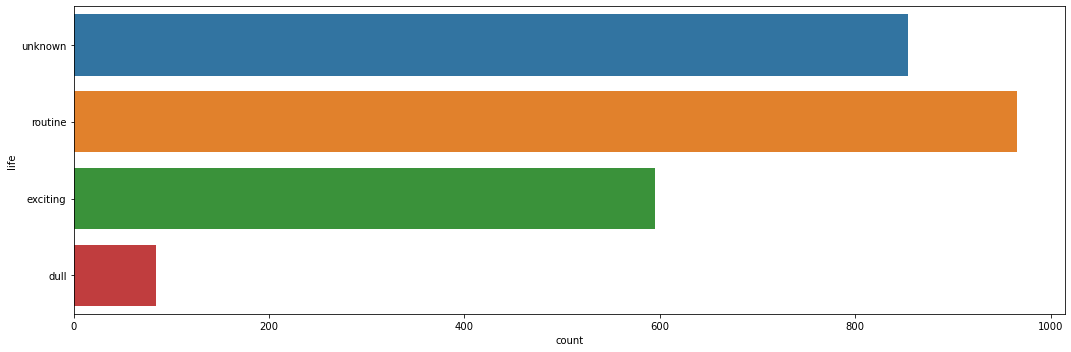

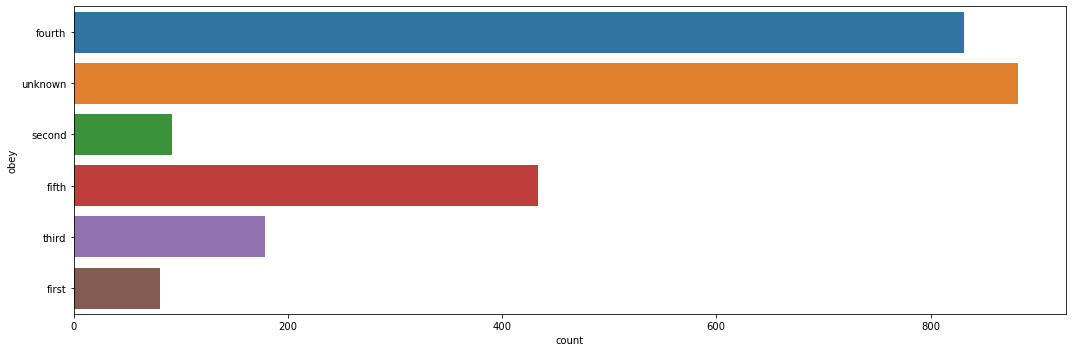

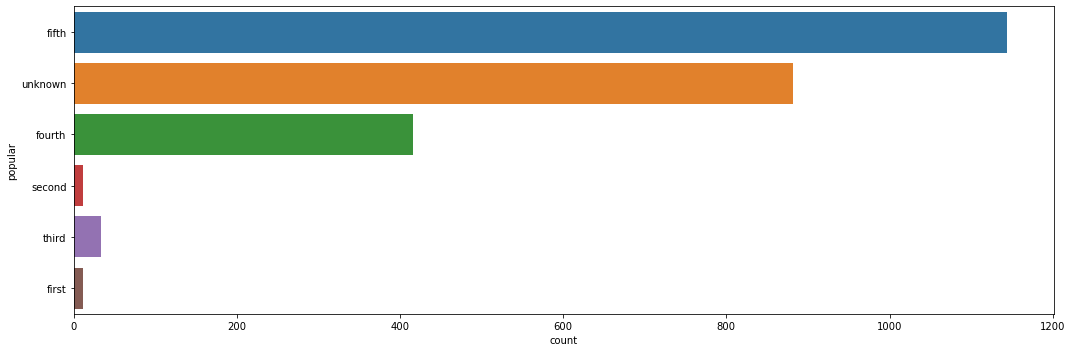

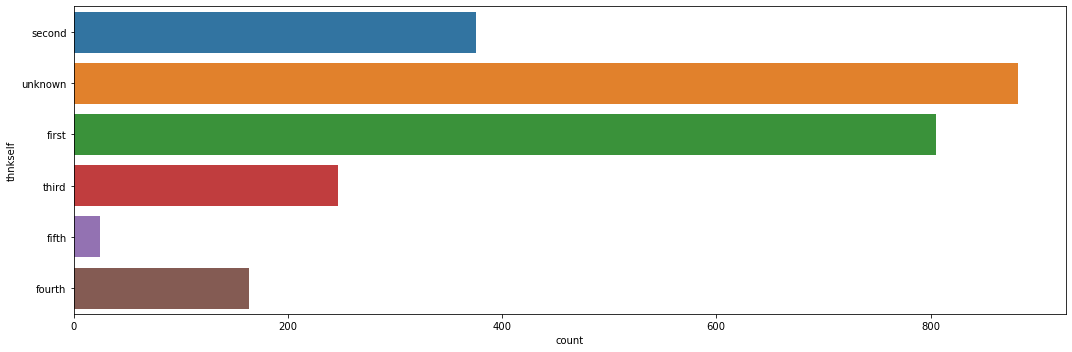

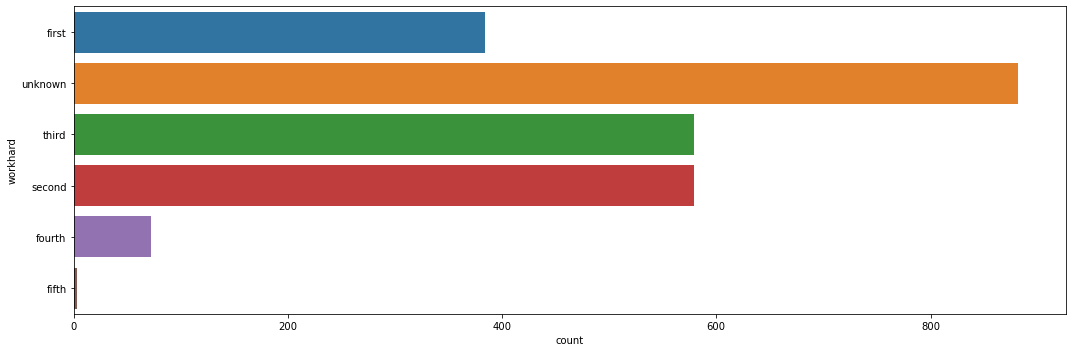

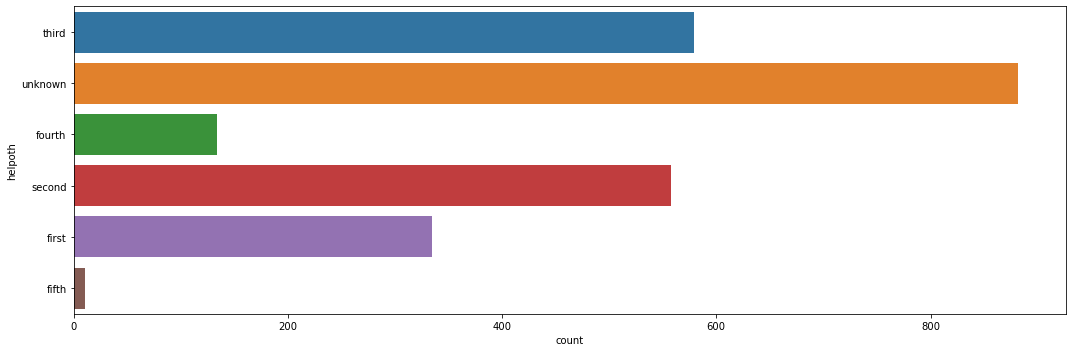

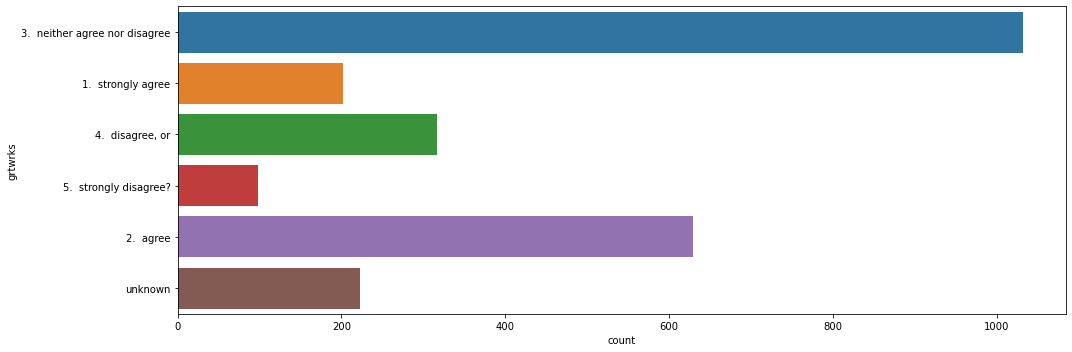

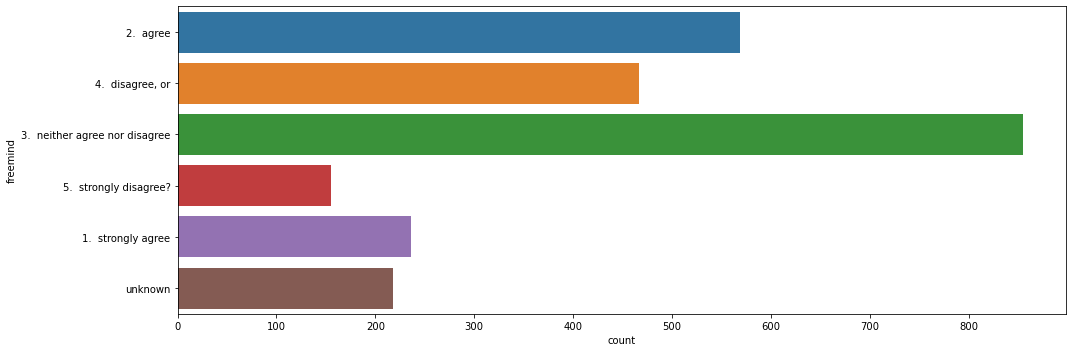

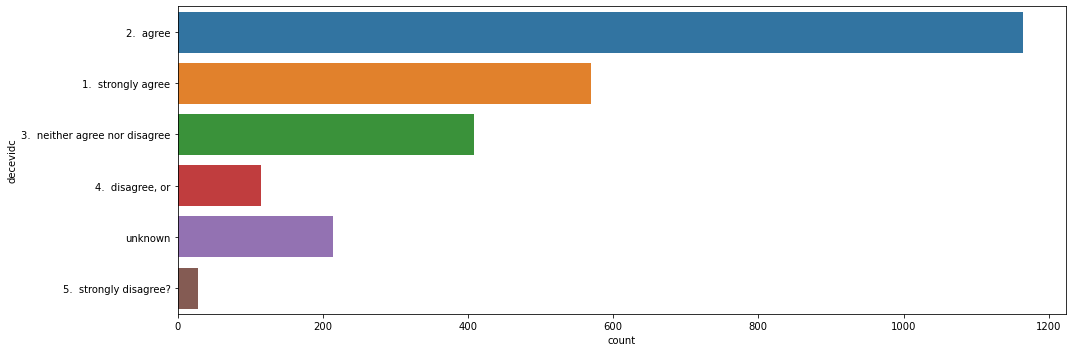

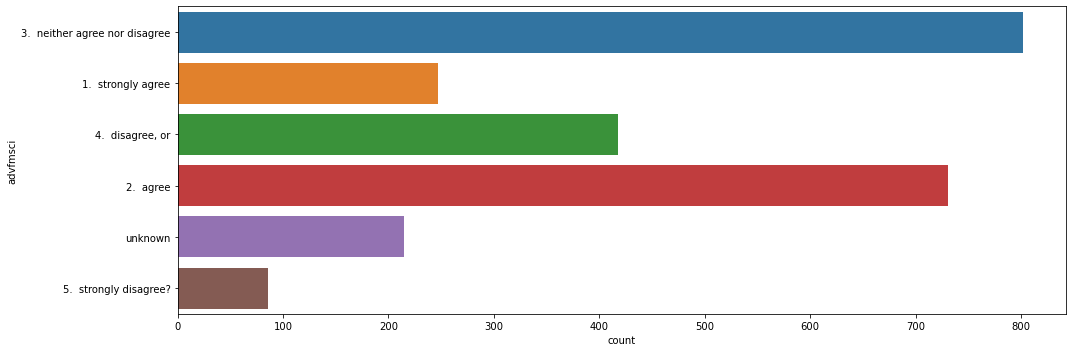

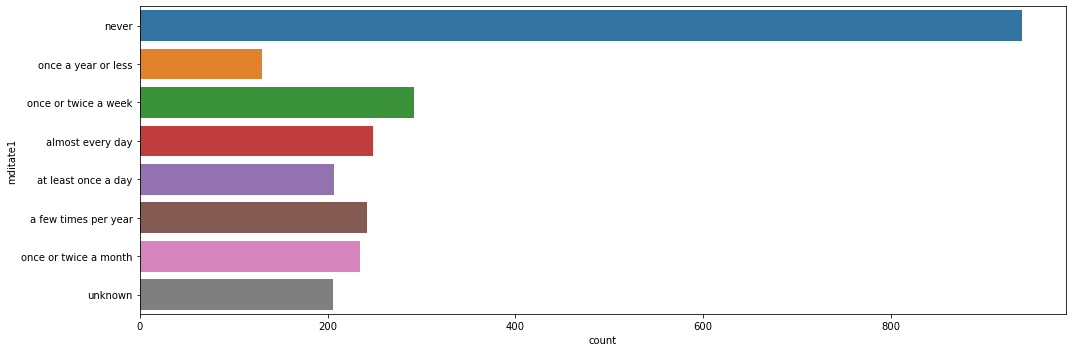

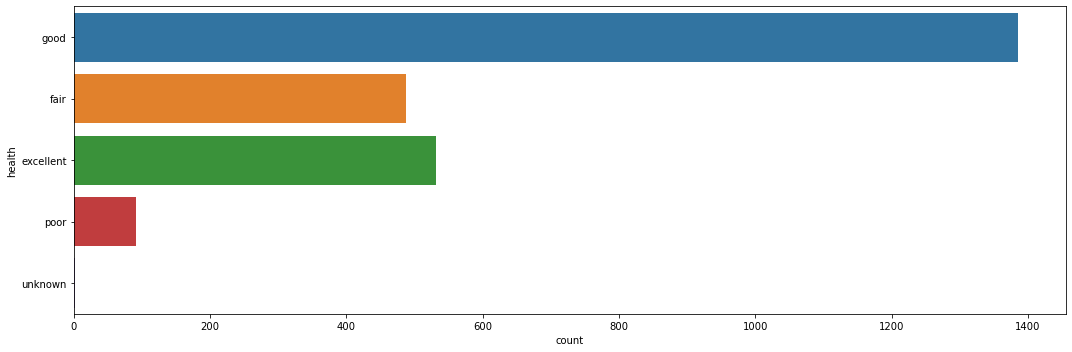

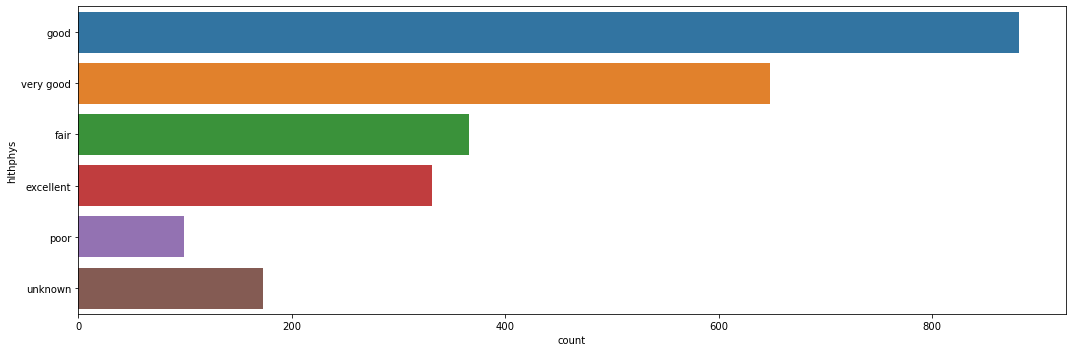

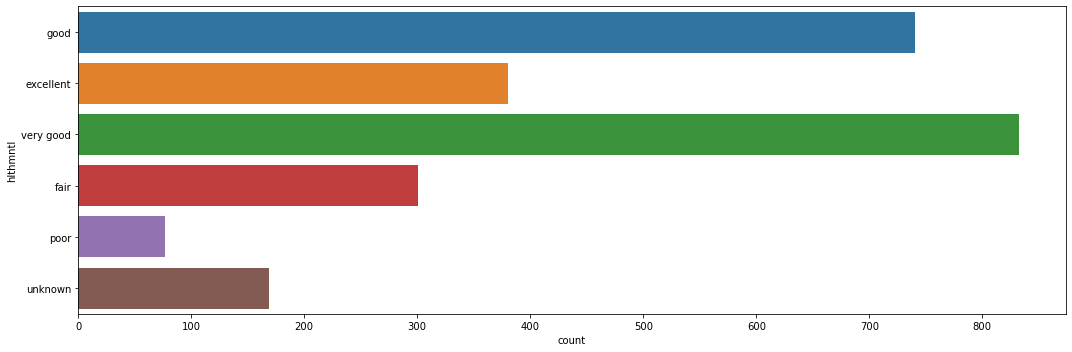

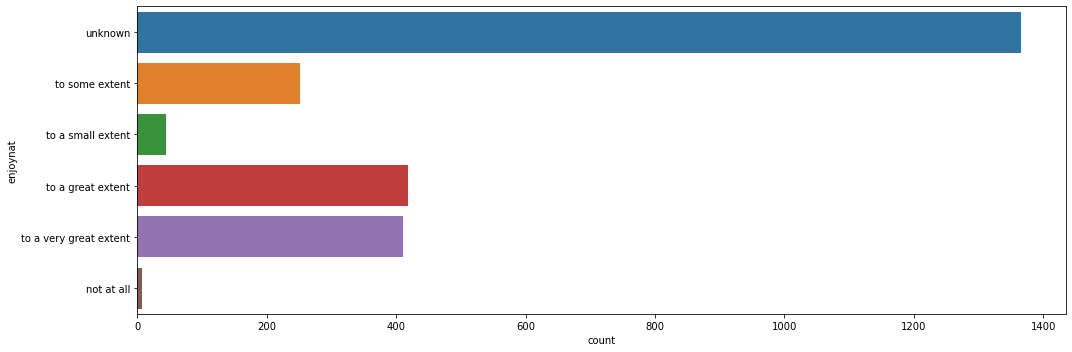

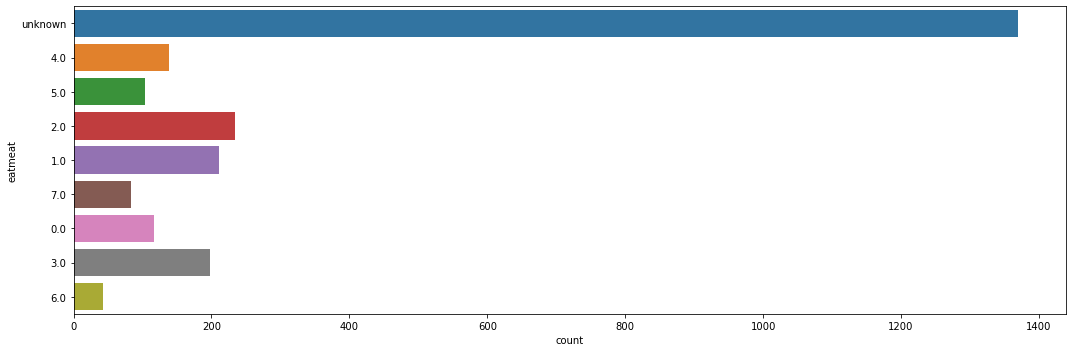

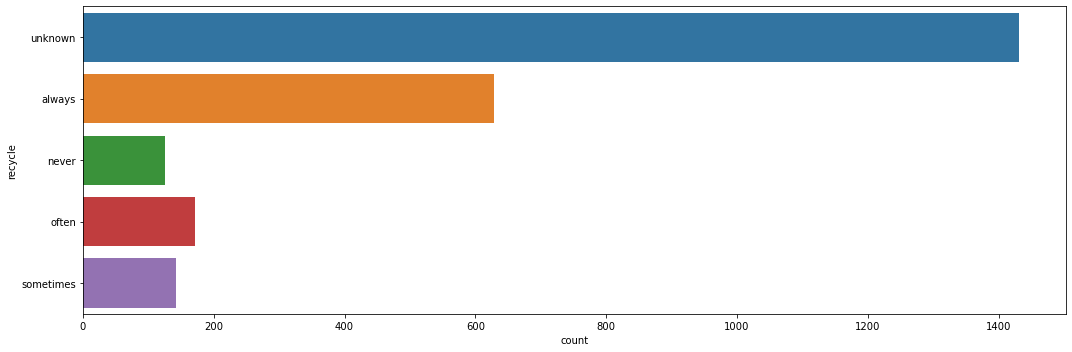

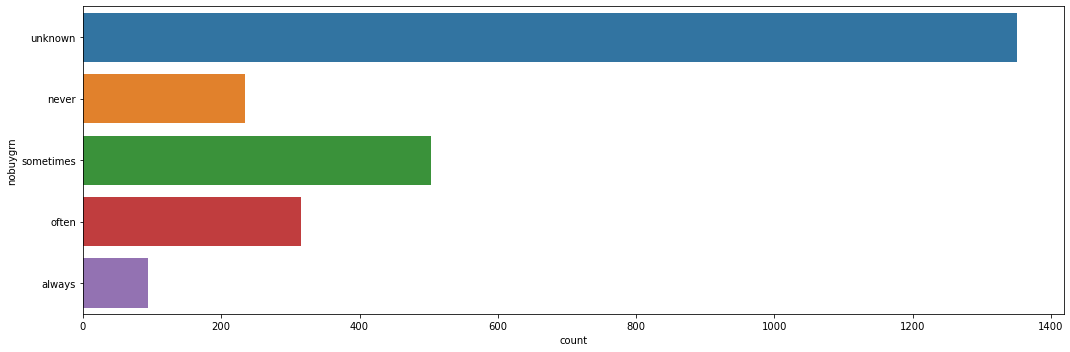

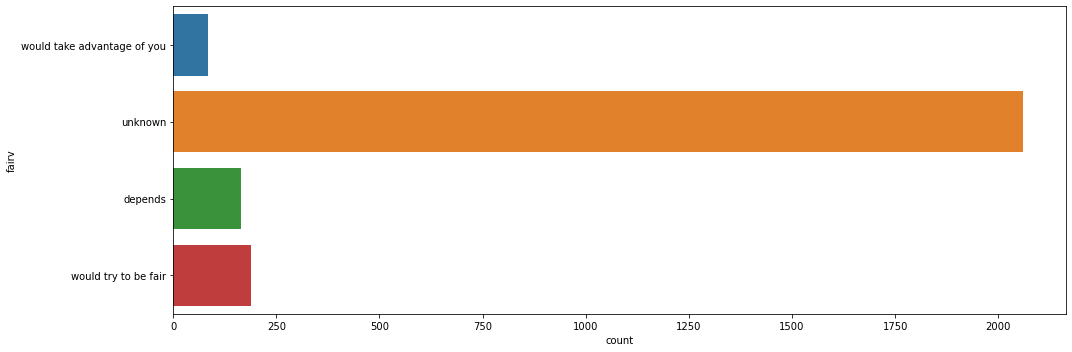

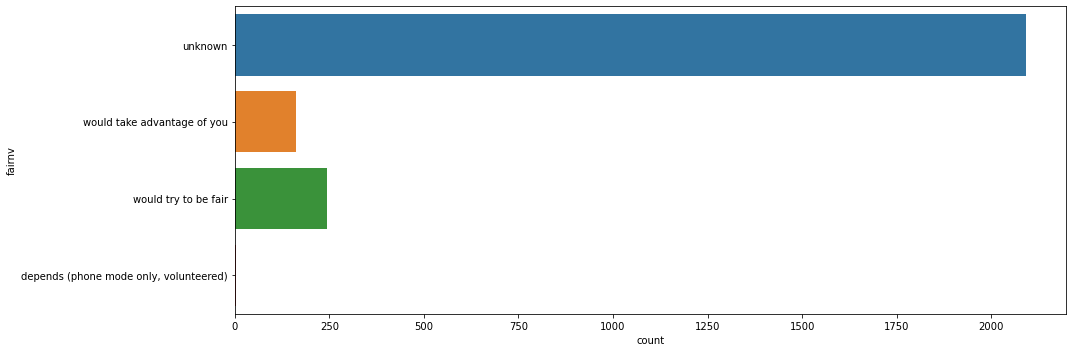

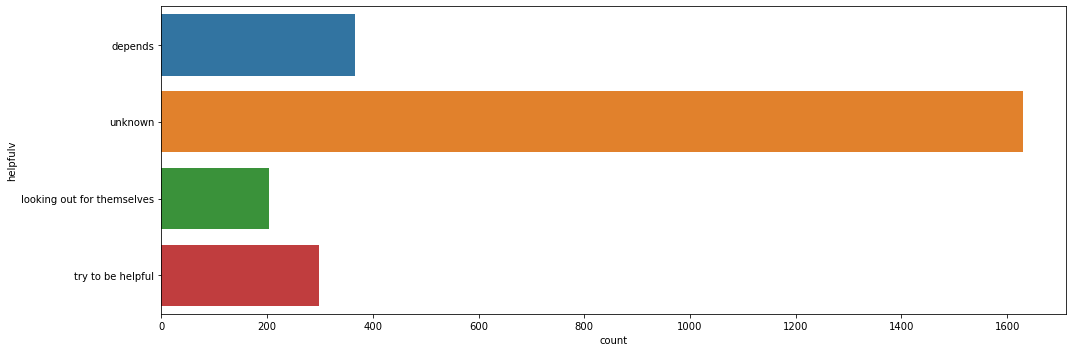

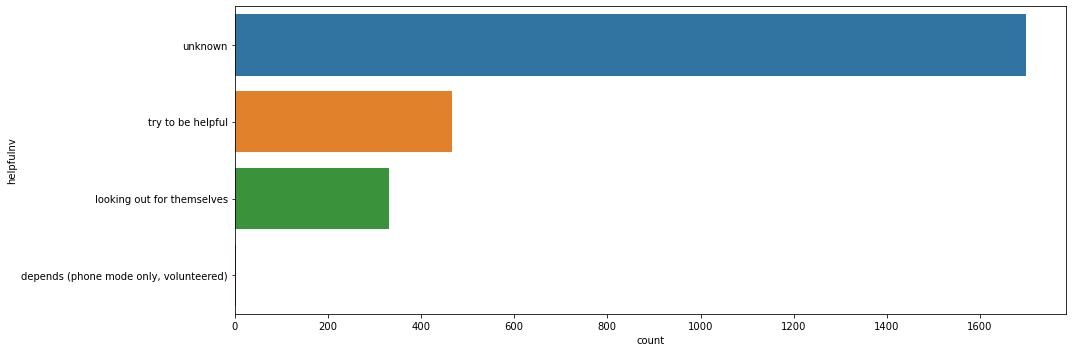

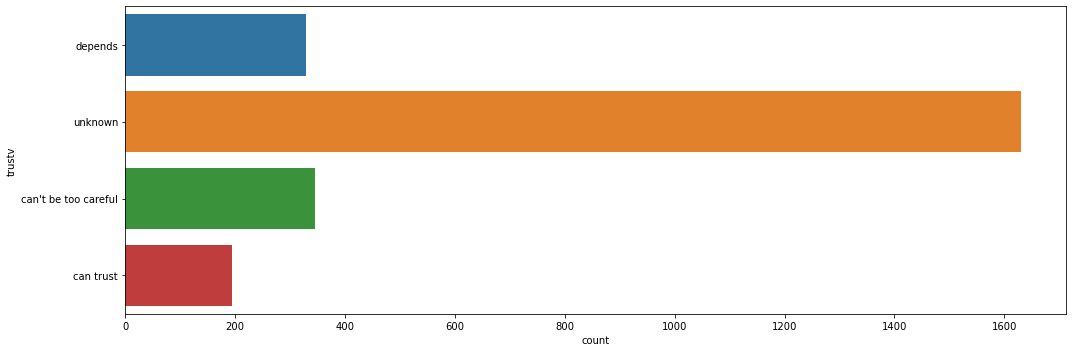

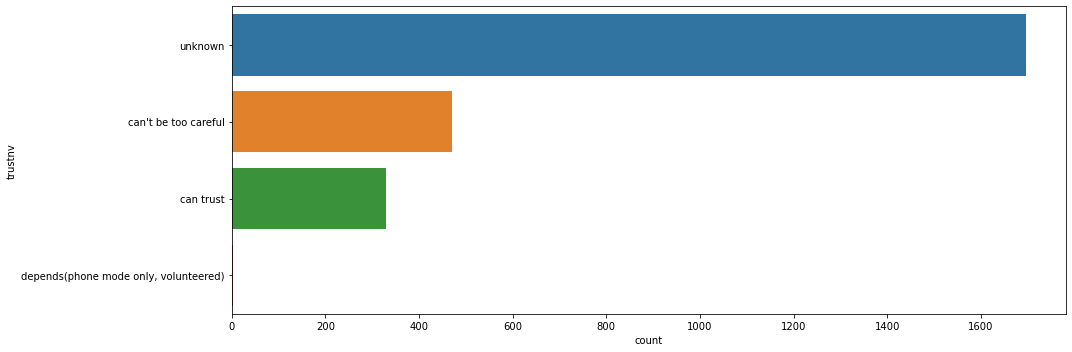

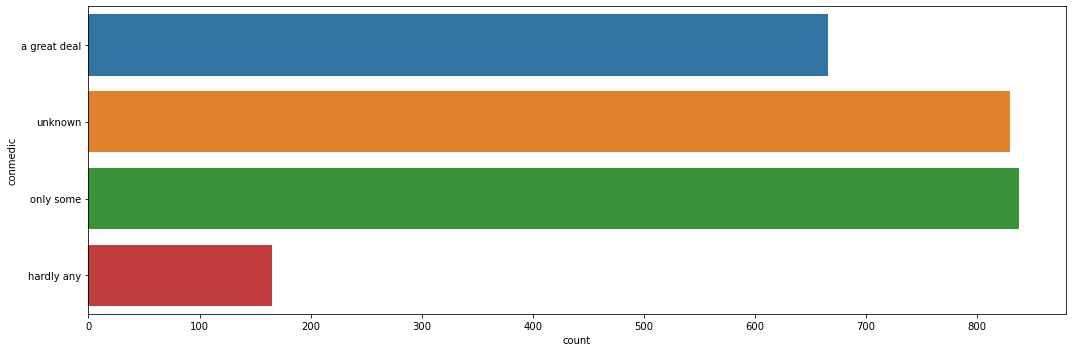

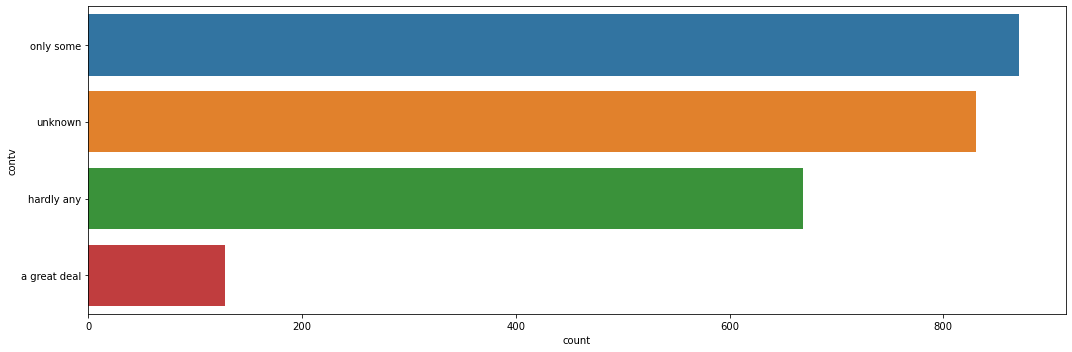

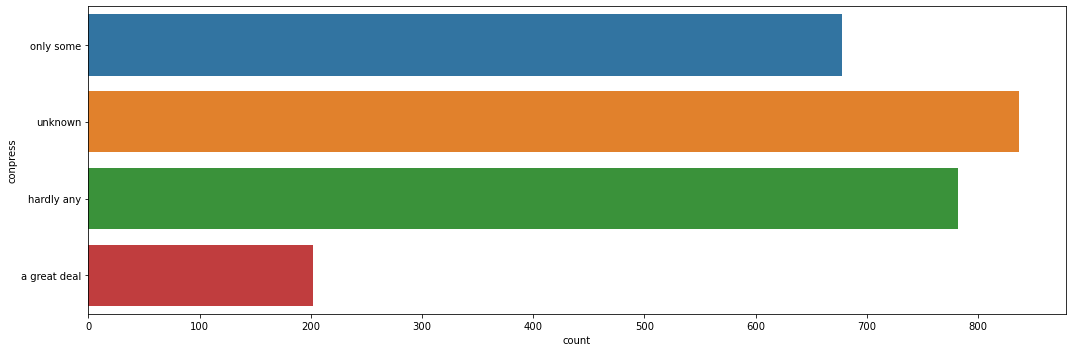

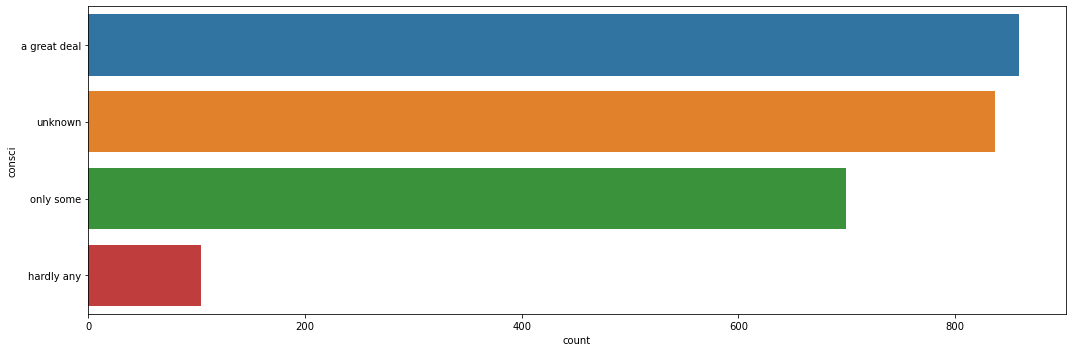

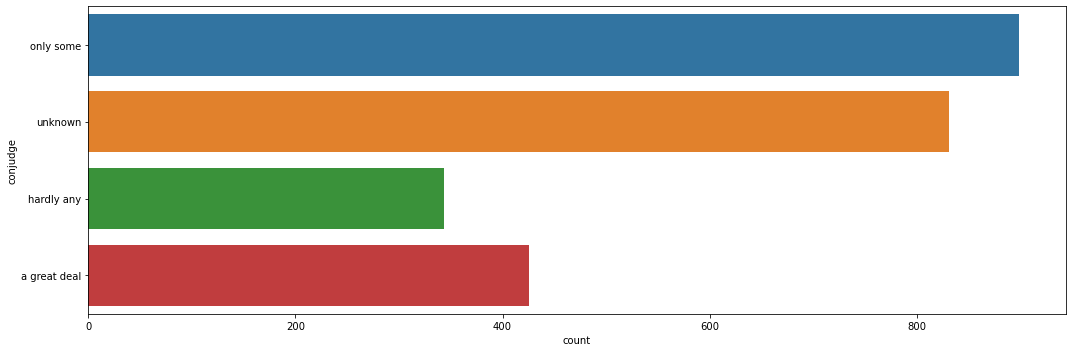

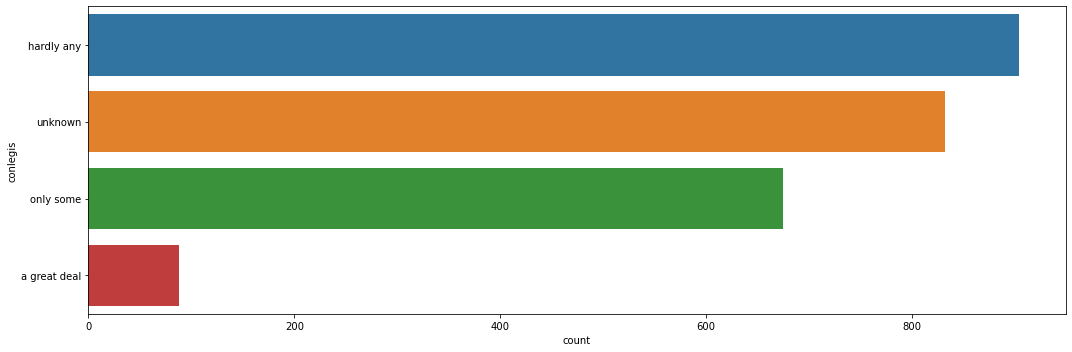

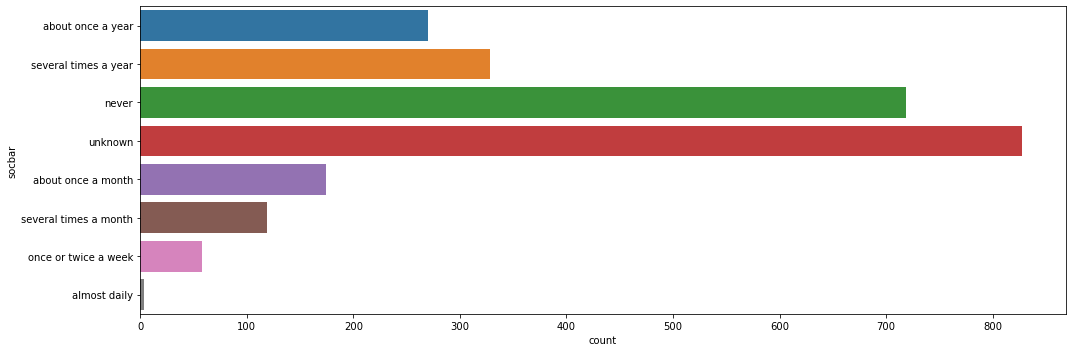

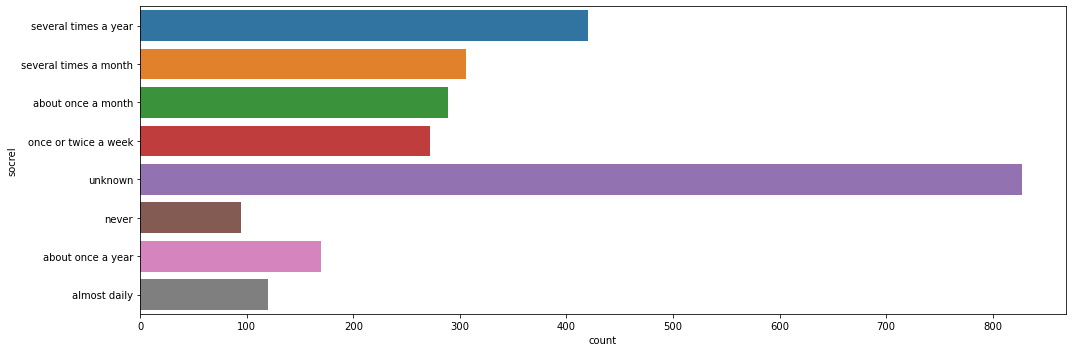

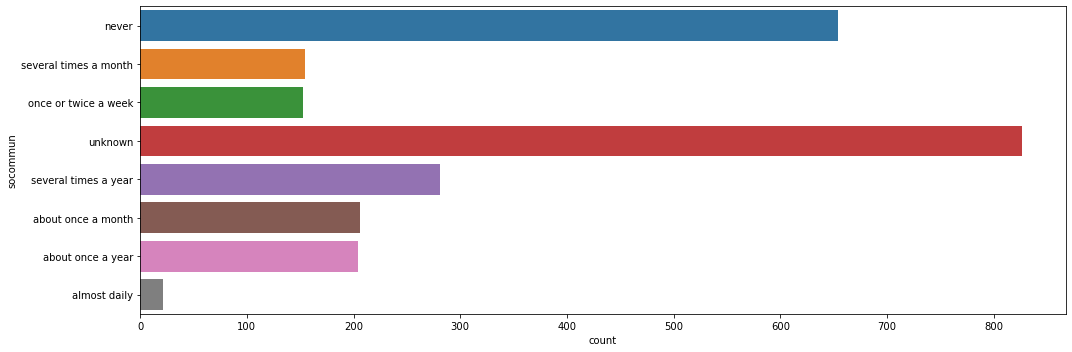

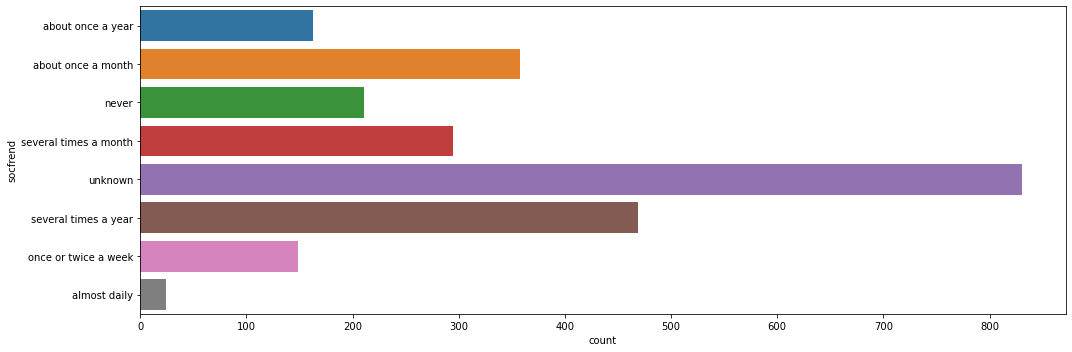

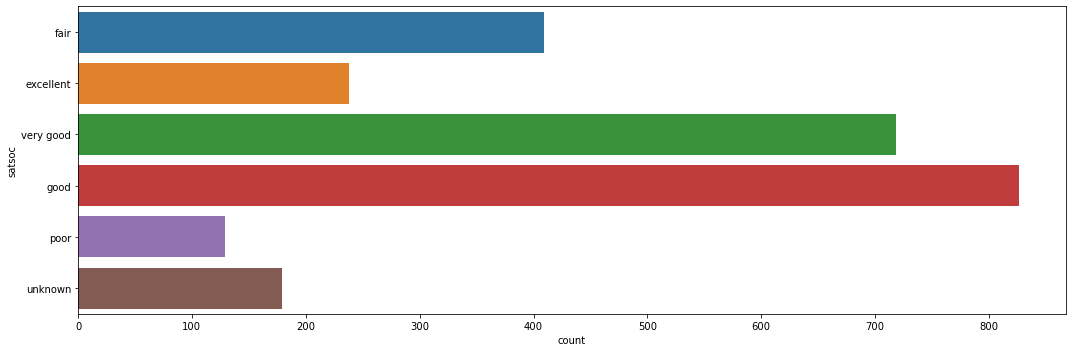

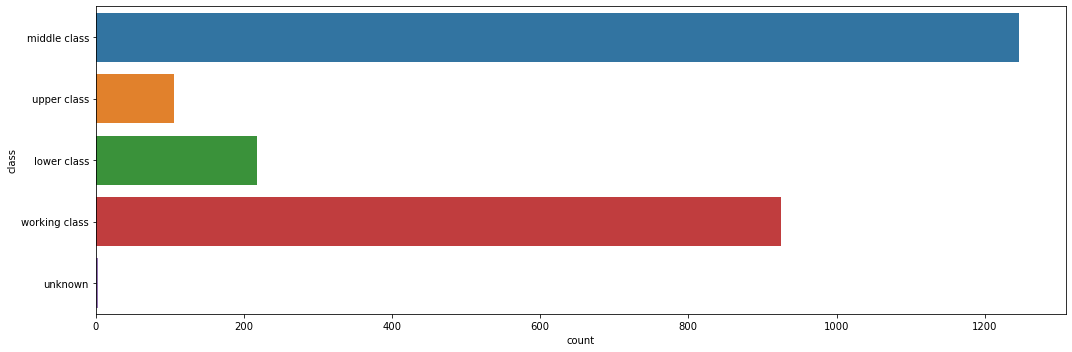

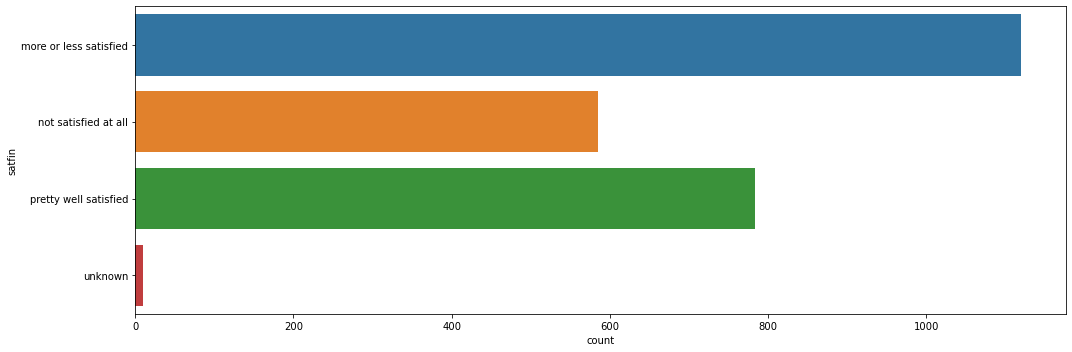

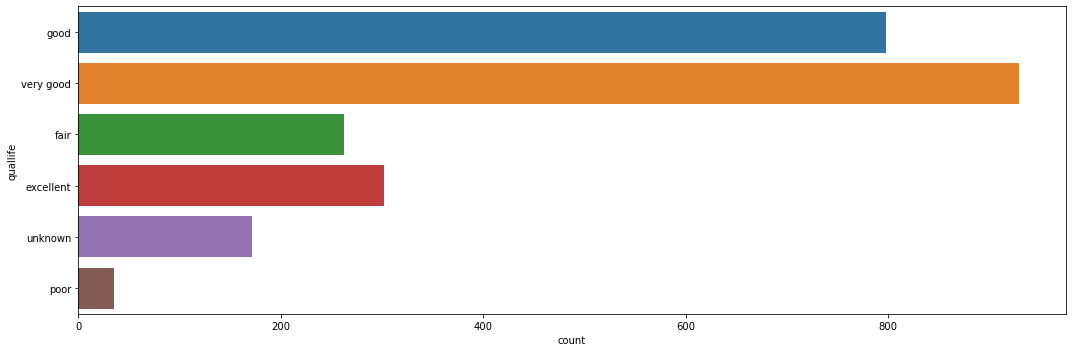

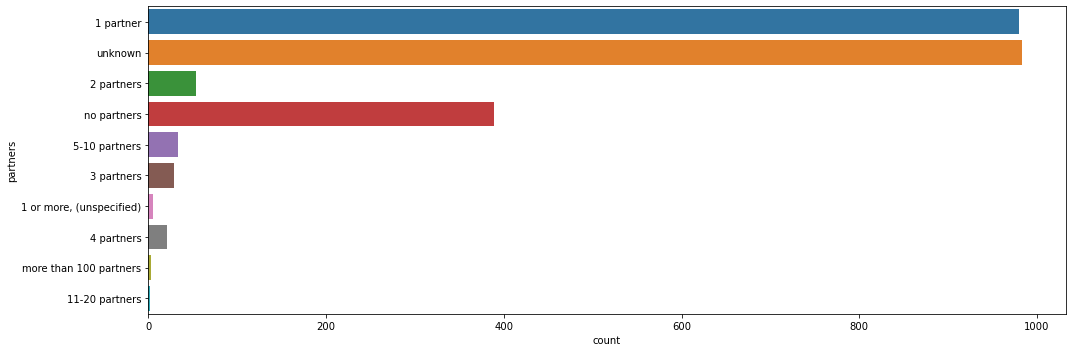

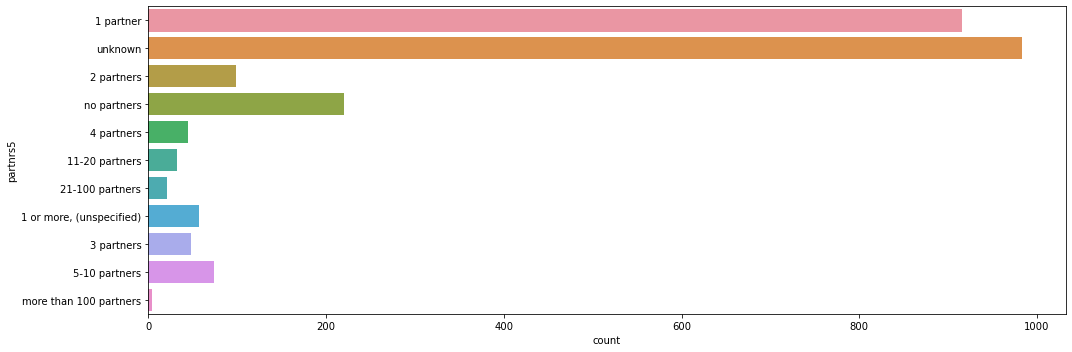

In [27]:
variable_count(train)

### TAKEAWAYS:
- I'll try moving towards MVP but I think that at least figuring out how to bin age groups, and create a numeric column for the zodiac signs.

In [28]:
#binning age into decades (8 equal bins)
ages = train.age
train.age = pd.cut(ages, 8, precision=0)

In [29]:
#looking at the bins created....
train.age.value_counts()

(54.0, 62.0]    423
(62.0, 71.0]    416
(36.0, 45.0]    386
(45.0, 54.0]    367
(27.0, 36.0]    363
(71.0, 80.0]    267
(18.0, 27.0]    173
(80.0, 89.0]    104
Name: age, dtype: int64

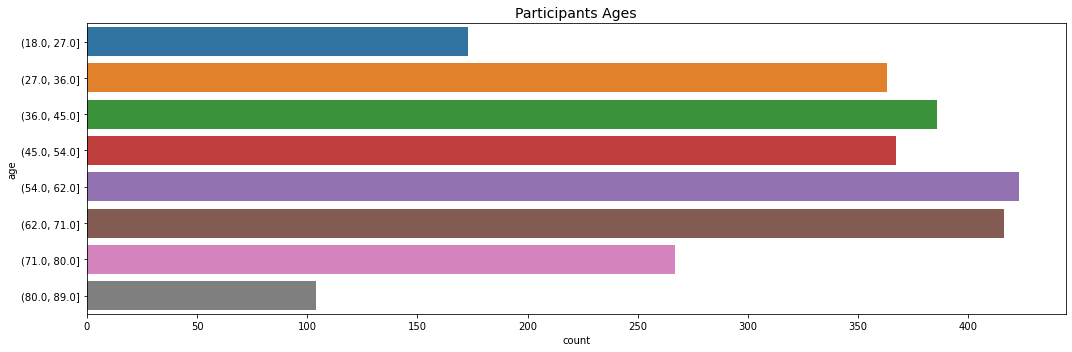

In [30]:
#plotting the new count of age bins
plt.figure(figsize = (15,  5))
sns.countplot(data = train, y = 'age')
plt.title(f"Participants Ages", fontsize = 14)
plt.tight_layout()
plt.show()

^ The above function of binning ages has been added to the wrangle.py file

______________________________________________________________________________

## Adding columns and encoding:

I'd like to add a column that numbers the zodiac in order, so as to have continous data on the target variable.

In [31]:
from sklearn.preprocessing import LabelEncoder
# Creating a instance of label Encoder.
le = LabelEncoder()
 
# Using .fit_transform function to fit label
# encoder and return encoded label
label = le.fit_transform(train['zodiac'])
#create a new column for numeric zodiac
train["zodiac_num"] = label

In [32]:
train.head(1)

,zodiac,race,age,sex,sexornt,marital,res16,reg16,degree,income,...,socrel,socommun,socfrend,satsoc,class,satfin,quallife,partners,partnrs5,zodiac_num
238,libra,white,"(36.0, 45.0]",female,heterosexual or straight,married,in open country but not on a farm,east north central,graduate,"$25,000 or more",...,several times a year,never,about once a year,fair,middle class,more or less satisfied,good,1 partner,1 partner,6


### Encoding Columns for numeric sake:

In [33]:
# using get_dummies to encode sex, race, degree and class columns-then concatinating them to the train df
dummy_df = pd.get_dummies(train[['sex','race','degree','class']], dummy_na=False, drop_first= False, dtype=int)
train = pd.concat([train, dummy_df], axis=1)

In [34]:
train.head(1)

,zodiac,race,age,sex,sexornt,marital,res16,reg16,degree,income,...,degree_bachelor's,degree_graduate,degree_high school,degree_less than high school,degree_unknown,class_lower class,class_middle class,class_unknown,class_upper class,class_working class
238,libra,white,"(36.0, 45.0]",female,heterosexual or straight,married,in open country but not on a farm,east north central,graduate,"$25,000 or more",...,0,1,0,0,0,0,1,0,0,0


#### Encoding zodiac column:

In [35]:
# get the dummies and store it in a variable
dummy_df2 = pd.get_dummies(train[['zodiac']], dummy_na=False, drop_first= False, dtype=int)
train = pd.concat([train, dummy_df2], axis=1)

In [36]:
train.columns

Index(['zodiac', 'race', 'age', 'sex', 'sexornt', 'marital', 'res16', 'reg16',
       'degree', 'income', 'wrkslf', 'satjob', 'occ10', 'partyid', 'if16who',
       'polviews', 'gunlaw', 'grassv', 'relig', 'postlifev', 'postlifenv',
       'sprtprsn', 'sprtconnct', 'sprtlrgr', 'sprtpurp', 'happy', 'life',
       'obey', 'popular', 'thnkself', 'workhard', 'helpoth', 'grtwrks',
       'freemind', 'decevidc', 'advfmsci', 'mditate1', 'health', 'hlthphys',
       'hlthmntl', 'enjoynat', 'eatmeat', 'recycle', 'nobuygrn', 'fairv',
       'fairnv', 'helpfulv', 'helpfulnv', 'trustv', 'trustnv', 'conmedic',
       'contv', 'conpress', 'consci', 'conjudge', 'conlegis', 'socbar',
       'socrel', 'socommun', 'socfrend', 'satsoc', 'class', 'satfin',
       'quallife', 'partners', 'partnrs5', 'zodiac_num', 'sex_female',
       'sex_male', 'sex_unknown', 'race_black', 'race_other', 'race_unknown',
       'race_white', 'degree_associate/junior college', 'degree_bachelor's',
       'degree_graduate', 'd

### Adding column to have birthdates that relate to Zodiac Sign

In [37]:
def zodiac_dates(row):  
    if row['zodiac'] == 'libra':
        return 'Sept 22-Oct 23'
    elif row['zodiac'] == 'aries':
        return 'March 21-April 19'
    elif row['zodiac'] == 'taurus':
        return 'April 20-May 20'
    elif row['zodiac'] == 'gemini':
        return 'May 21-June 21'
    elif row['zodiac'] == 'cancer':
        return 'June 22-July 22'
    elif row['zodiac'] == 'leo':
        return 'July 23-Aug 22'
    elif row['zodiac'] == 'virgo':
        return 'Aug 23-Sept 22'
    elif row['zodiac'] == 'scorpio':
        return 'Oct 23-Nov 21'
    elif row['zodiac'] == 'sagittarius':
        return 'Nov 22-Dec 21'
    elif row['zodiac'] == 'capricorn':
        return 'Dec 22-Jan 19'
    elif row['zodiac'] == 'aquarius':
        return 'Jan 20-Feb 18'
    return 'Feb 19-March 20'

In [38]:
#adding this row with the date function:
train['zodiac_dates'] = train.apply(lambda row: zodiac_dates(row), axis=1)
train.head()

,zodiac,race,age,sex,sexornt,marital,res16,reg16,degree,income,...,zodiac_capricorn,zodiac_gemini,zodiac_leo,zodiac_libra,zodiac_pisces,zodiac_sagittarius,zodiac_scorpio,zodiac_taurus,zodiac_virgo,zodiac_dates
238,libra,white,"(36.0, 45.0]",female,heterosexual or straight,married,in open country but not on a farm,east north central,graduate,"$25,000 or more",...,0,0,0,1,0,0,0,0,0,Sept 22-Oct 23
342,libra,white,"(45.0, 54.0]",male,unknown,married,in a suburb near a large city,middle atlantic,graduate,refused,...,0,0,0,1,0,0,0,0,0,Sept 22-Oct 23
786,sagittarius,black,"(45.0, 54.0]",female,heterosexual or straight,never married,"in a small city or town (under 50,000)",south atlantic,high school,unknown,...,0,0,0,0,0,1,0,0,0,Nov 22-Dec 21
1767,libra,black,"(62.0, 71.0]",female,heterosexual or straight,never married,"in a large city (over 250,000)",east north central,bachelor's,unknown,...,0,0,0,1,0,0,0,0,0,Sept 22-Oct 23
509,virgo,black,"(36.0, 45.0]",female,heterosexual or straight,never married,"in a medium-size city (50,000-250,000)",south atlantic,high school,"$20,000 to $24,999",...,0,0,0,0,0,0,0,0,1,Aug 23-Sept 22


In [39]:
train.shape

(2499, 98)

In [40]:
train.sex.value_counts()

female     1392
male       1100
unknown       7
Name: sex, dtype: int64

## Looking at the counts of Zodiac:

<AxesSubplot:ylabel='zodiac'>

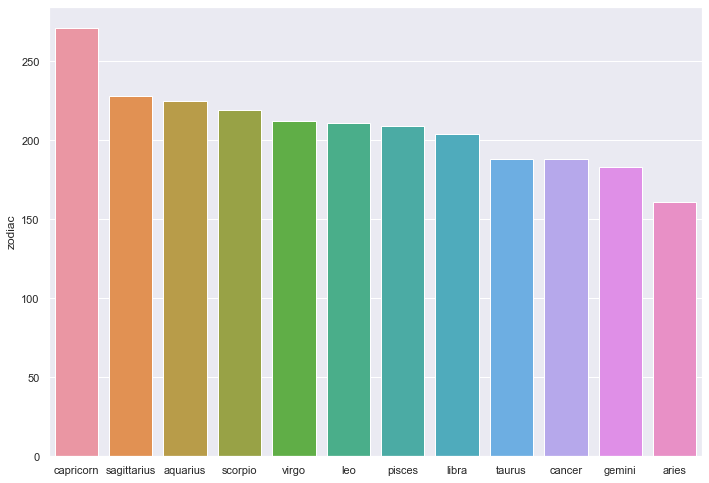

In [41]:
sns.set(rc={'figure.figsize':(11.7,8.27)})

sns.barplot(x=train.zodiac.value_counts().index, y=train.zodiac.value_counts())

## Visualizing Bivariates: Gender and Signs
#### Key Takeaways:
- Female participants: 1,392 |  55.7% of participants
- Male participants: 1,100 | 44% of participants
- Other gender parti: 7 | .02%ish


<AxesSubplot:xlabel='sex_male', ylabel='zodiac_scorpio'>

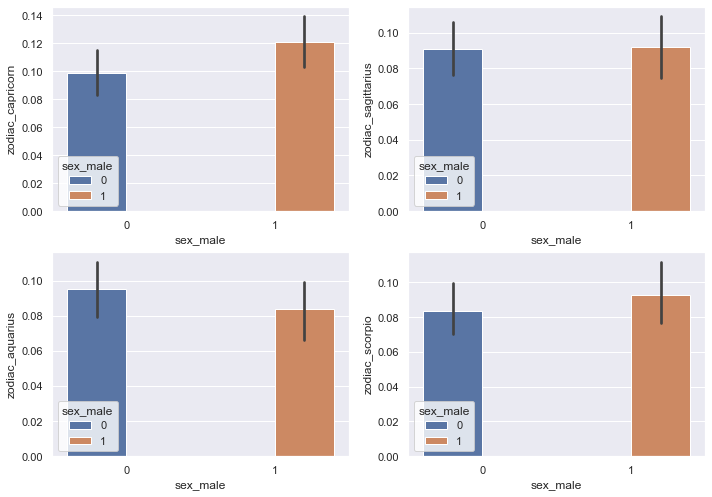

In [42]:
#define dimensions of subplots (rows, columns)
fig, axes = plt.subplots(2, 2)
sns.set_theme(style="whitegrid")

#create chart in each subplot
sns.barplot(data=train, x='sex_male', y='zodiac_capricorn', ax=axes[0,0], hue="sex_male")
sns.barplot(data=train, x='sex_male', y='zodiac_sagittarius', ax=axes[0,1], hue="sex_male")
sns.barplot(data=train, x='sex_male', y='zodiac_aquarius', ax=axes[1,0], hue="sex_male")
sns.barplot(data=train, x='sex_male', y='zodiac_scorpio', ax=axes[1,1], hue="sex_male")

<AxesSubplot:xlabel='sex_male', ylabel='zodiac_libra'>

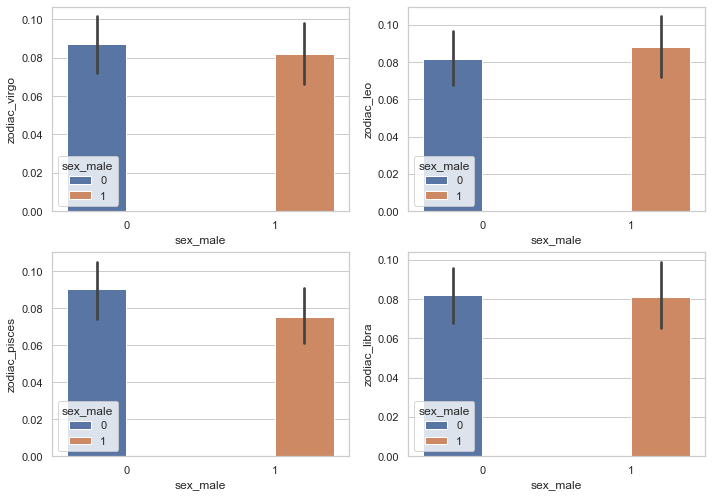

In [43]:
#define dimensions of subplots (rows, columns)
fig, axes = plt.subplots(2, 2)
sns.set_theme(style="whitegrid")

#create chart in each subplot

sns.barplot(data=train, x='sex_male', y='zodiac_virgo', ax=axes[0,0], hue="sex_male")
sns.barplot(data=train, x='sex_male', y='zodiac_leo', ax=axes[0,1], hue="sex_male")
sns.barplot(data=train, x='sex_male', y='zodiac_pisces', ax=axes[1,0], hue="sex_male")
sns.barplot(data=train, x='sex_male', y='zodiac_libra', ax=axes[1,1], hue="sex_male")

<AxesSubplot:xlabel='sex_male', ylabel='zodiac_aries'>

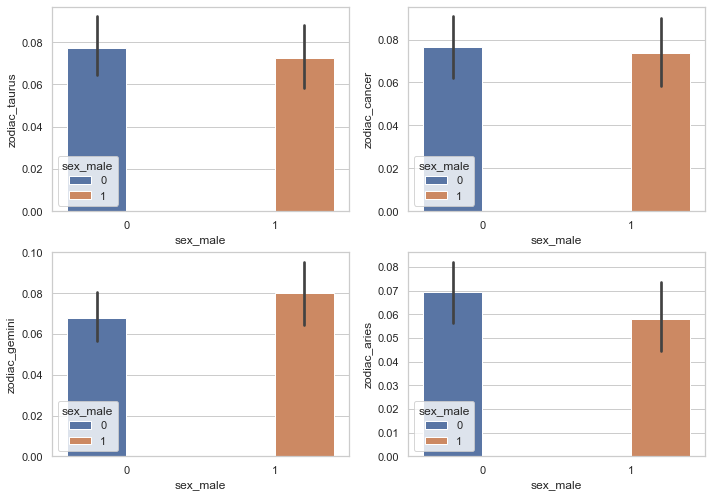

In [44]:
#define dimensions of subplots (rows, columns)
fig, axes = plt.subplots(2, 2)
sns.set_theme(style="whitegrid")

#create chart in each subplot

sns.barplot(data=train, x='sex_male', y='zodiac_taurus', ax=axes[0,0], hue="sex_male")
sns.barplot(data=train, x='sex_male', y='zodiac_cancer', ax=axes[0,1], hue="sex_male")
sns.barplot(data=train, x='sex_male', y='zodiac_gemini', ax=axes[1,0], hue="sex_male")
sns.barplot(data=train, x='sex_male', y='zodiac_aries', ax=axes[1,1], hue="sex_male")

### TAKEAWAYS:
- There really aren't large differences when it comes to male vs female gendered participants and their zodiac signs.
- <b>Gender is not a main driver of zodiac predictors.

_____________________________________________________________________________________

## Looking at the marital status percentages by Zodiac signs:

Key Takeaways on this variable:
- There are significant variances between zodiac signs and marital status groupings. 
- Note: these variances more than likely could be due to the training data sizes (since there are only between 150-250 per zodiac for training data.
- <b> Could be a driver of prediction model.

In [45]:
#percentage of divorced zodiacs
train.groupby('marital').zodiac.value_counts(normalize=True)['divorced']

zodiac
virgo                         0.10
scorpio                       0.10
pisces                        0.09
taurus                        0.09
leo                           0.09
aquarius                      0.08
sagittarius                   0.08
capricorn                     0.08
libra                         0.08
aries                         0.07
cancer                        0.07
gemini                        0.07
Name: zodiac, dtype: float64

In [46]:
#percentage of married zodiacs
train.groupby('marital').zodiac.value_counts(normalize=True)['married']

zodiac
capricorn                     0.12
sagittarius                   0.10
libra                         0.09
aquarius                      0.09
scorpio                       0.09
virgo                         0.08
leo                           0.08
pisces                        0.08
gemini                        0.07
taurus                        0.07
cancer                        0.07
aries                         0.06
Name: zodiac, dtype: float64

In [47]:
#percentage of never married zodiacs
train.groupby('marital').zodiac.value_counts(normalize=True)['never married']

zodiac
capricorn                     0.11
sagittarius                   0.09
pisces                        0.09
aquarius                      0.09
scorpio                       0.09
cancer                        0.08
leo                           0.08
gemini                        0.08
virgo                         0.08
libra                         0.07
taurus                        0.07
aries                         0.06
Name: zodiac, dtype: float64

In [48]:
#percentage of widowed zodiacs
train.groupby('marital').zodiac.value_counts(normalize=True)['widowed']

zodiac
aquarius                      0.12
capricorn                     0.11
leo                           0.10
aries                         0.08
taurus                        0.08
virgo                         0.08
libra                         0.08
pisces                        0.08
sagittarius                   0.07
scorpio                       0.07
gemini                        0.07
cancer                        0.06
Name: zodiac, dtype: float64

<AxesSubplot:xlabel='marital', ylabel='zodiac_scorpio'>

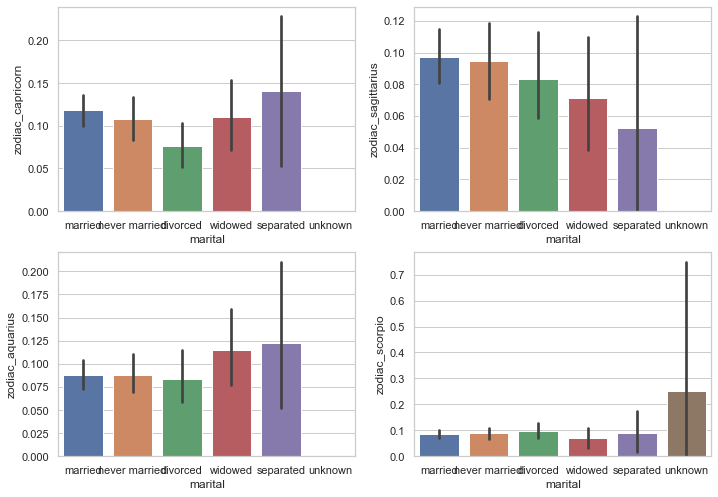

In [49]:
#define dimensions of subplots (rows, columns)
fig, axes = plt.subplots(2, 2)
sns.set_theme(style="whitegrid")

#create chart in each subplot

sns.barplot( data= train, x='marital', y="zodiac_capricorn", ax=axes[0,0])
sns.barplot(data=train, x='marital', y='zodiac_sagittarius', ax=axes[0,1])
sns.barplot(data=train, x='marital', y='zodiac_aquarius', ax=axes[1,0])
sns.barplot(data=train, x='marital', y='zodiac_scorpio', ax=axes[1,1])

<AxesSubplot:xlabel='marital', ylabel='zodiac_libra'>

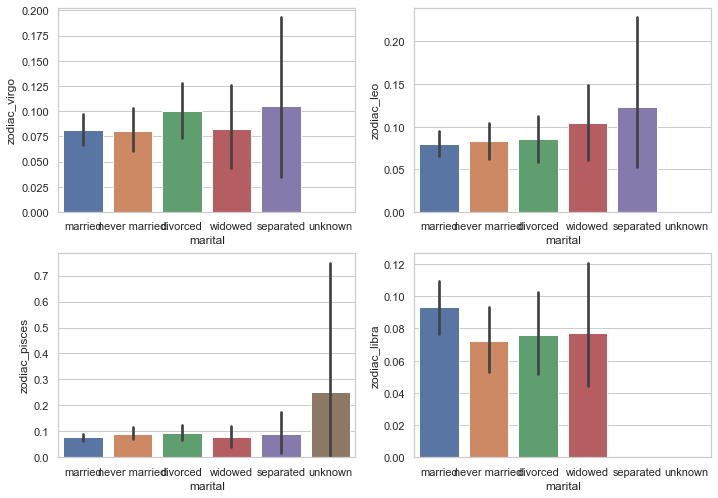

In [50]:
fig, axes = plt.subplots(2, 2)
sns.set_theme(style="whitegrid")

#create chart in each subplot

sns.barplot(data=train, x='marital', y='zodiac_virgo', ax=axes[0,0])
sns.barplot(data=train, x='marital', y='zodiac_leo', ax=axes[0,1])
sns.barplot(data=train, x='marital', y='zodiac_pisces', ax=axes[1,0])
sns.barplot(data=train, x='marital', y='zodiac_libra', ax=axes[1,1])

<AxesSubplot:xlabel='marital', ylabel='zodiac_aries'>

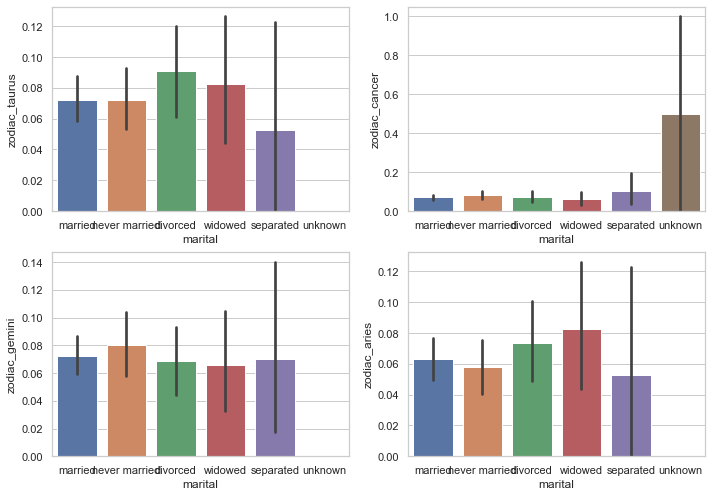

In [51]:
#define dimensions of subplots (rows, columns)
fig, axes = plt.subplots(2, 2)
sns.set_theme(style="whitegrid")

sns.barplot( data= train, x='marital', y="zodiac_taurus", ax=axes[0,0])
sns.barplot(data=train, x='marital', y='zodiac_cancer', ax=axes[0,1])
sns.barplot(data=train, x='marital', y='zodiac_gemini', ax=axes[1,0])
sns.barplot(data=train, x='marital', y='zodiac_aries', ax=axes[1,1])

_____________________________________________________

## Looking at the Religious status percentages by Zodiac signs:

Key Takeaways on this variable:
- This data set definitely is heavily Protestant-based, which makes me wonder maybe the religious affiliations for University of Chicago itself. 
- Capricorns also seem to make up a good percentage of this data set too.
- I wonder if rather than zodiac, birthdates here are more indicative of the religious numbers and could relate to religious holidays or fasting breaks and when a child was conceived.
- <b> Use as a driver...unsure...

In [52]:
#Looking at religion value counts
train.relig.value_counts()

protestant                 983
none                       725
catholic                   521
christian                   78
jewish                      45
buddhism                    35
other                       28
unknown                     19
orthodox-christian          18
muslim/islam                17
hinduism                    15
inter-nondenominational     11
native american              2
other eastern religions      2
Name: relig, dtype: int64

In [53]:
#percentage of protestant by zodiac
train.groupby('relig').zodiac.value_counts(normalize=True)['protestant']

zodiac
capricorn                     0.10
sagittarius                   0.10
aquarius                      0.10
leo                           0.09
cancer                        0.09
scorpio                       0.09
libra                         0.08
pisces                        0.08
taurus                        0.07
virgo                         0.07
gemini                        0.07
aries                         0.05
Name: zodiac, dtype: float64

In [54]:
#percentage of no religious affiliation by zodiac
train.groupby('relig').zodiac.value_counts(normalize=True)['none']

zodiac
capricorn                     0.11
virgo                         0.10
aquarius                      0.09
gemini                        0.09
scorpio                       0.09
libra                         0.08
pisces                        0.08
cancer                        0.07
sagittarius                   0.07
taurus                        0.07
leo                           0.07
aries                         0.06
Name: zodiac, dtype: float64

In [55]:
#percentage of catholic affiliation by zodiac
train.groupby('relig').zodiac.value_counts(normalize=True)['catholic']

zodiac
capricorn                     0.11
sagittarius                   0.10
scorpio                       0.09
aquarius                      0.09
pisces                        0.09
aries                         0.09
virgo                         0.08
libra                         0.08
taurus                        0.07
leo                           0.07
cancer                        0.07
gemini                        0.06
Name: zodiac, dtype: float64

In [56]:
#percentage of christian faith religions by zodiac
train.groupby('relig').zodiac.value_counts(normalize=True)['christian']

zodiac
libra                         0.15
virgo                         0.14
leo                           0.13
sagittarius                   0.13
scorpio                       0.09
pisces                        0.08
taurus                        0.08
aquarius                      0.06
capricorn                     0.06
aries                         0.04
cancer                        0.03
gemini                        0.01
Name: zodiac, dtype: float64

In [57]:
#percentage of jewish religion affiliation by zodiac
train.groupby('relig').zodiac.value_counts(normalize=True)['jewish']

zodiac
capricorn                     0.18
leo                           0.16
aries                         0.13
libra                         0.11
pisces                        0.09
taurus                        0.09
cancer                        0.07
sagittarius                   0.07
gemini                        0.04
aquarius                      0.02
scorpio                       0.02
virgo                         0.02
Name: zodiac, dtype: float64

In [58]:
#percentage of buddhism religion affiliation by zodiac
train.groupby('relig').zodiac.value_counts(normalize=True)['buddhism']

zodiac
capricorn                     0.20
pisces                        0.20
sagittarius                   0.14
scorpio                       0.09
aquarius                      0.06
cancer                        0.06
gemini                        0.06
leo                           0.06
virgo                         0.06
aries                         0.03
libra                         0.03
taurus                        0.03
Name: zodiac, dtype: float64

In [59]:
#percentage of other religious affiliation by zodiac
train.groupby('relig').zodiac.value_counts(normalize=True)['other']

zodiac
capricorn                     0.14
virgo                         0.14
aquarius                      0.11
taurus                        0.11
aries                         0.07
cancer                        0.07
gemini                        0.07
libra                         0.07
pisces                        0.07
scorpio                       0.07
leo                           0.04
sagittarius                   0.04
Name: zodiac, dtype: float64

In [60]:
#percentage of orthodox-christian religious affiliation by zodiac
train.groupby('relig').zodiac.value_counts(normalize=True)['orthodox-christian']

zodiac
gemini                        0.22
leo                           0.22
sagittarius                   0.17
cancer                        0.11
virgo                         0.11
aries                         0.06
pisces                        0.06
taurus                        0.06
Name: zodiac, dtype: float64

In [61]:
#percentage of muslim/islam religious affiliation by zodiac
train.groupby('relig').zodiac.value_counts(normalize=True)['muslim/islam']

zodiac
capricorn                   0.24
gemini                      0.24
pisces                      0.12
scorpio                     0.12
taurus                      0.12
aquarius                    0.06
leo                         0.06
virgo                       0.06
Name: zodiac, dtype: float64

In [62]:
#percentage of hinduism religious affiliation by zodiac
train.groupby('relig').zodiac.value_counts(normalize=True)['hinduism']

zodiac
aquarius                      0.13
capricorn                     0.13
leo                           0.13
scorpio                       0.13
taurus                        0.13
aries                         0.07
gemini                        0.07
libra                         0.07
pisces                        0.07
sagittarius                   0.07
Name: zodiac, dtype: float64

In [63]:
#percentage of other eastern religions affiliation by zodiac
train.groupby('relig').zodiac.value_counts(normalize=True)['other eastern religions']

zodiac
virgo                   1.00
Name: zodiac, dtype: float64

__________________________________________________________

## Looking at the Political standpoint percentages by Zodiac signs:

Key Takeaways on this variable:
- This data set definitely is heavily Protestant-based, which makes me wonder maybe the religious affiliations for University of Chicago itself. 
- Capricorns also seem to make up a good percentage of this data set too.
- I wonder if rather than zodiac, birthdates here are more indicative of the religious numbers and could relate to religious holidays or fasting breaks and when a child was conceived.
- <b> Use as a driver...unsure...

In [64]:
train.polviews.value_counts()

moderate, middle of the road    852
liberal                         386
conservative                    367
slightly liberal                336
slightly conservative           297
extremely liberal               131
extremely conservative          103
unknown                          27
Name: polviews, dtype: int64

In [65]:
#percentage of moderate, middle of the road by zodiac
train.groupby('polviews').zodiac.value_counts(normalize=True)['moderate, middle of the road']

zodiac
capricorn                     0.11
leo                           0.09
sagittarius                   0.09
pisces                        0.09
scorpio                       0.09
cancer                        0.08
libra                         0.08
aquarius                      0.08
virgo                         0.08
gemini                        0.07
taurus                        0.07
aries                         0.06
Name: zodiac, dtype: float64

In [66]:
#percentage of liberals by zodiac
train.groupby('polviews').zodiac.value_counts(normalize=True)['liberal']

zodiac
capricorn                     0.12
aquarius                      0.10
cancer                        0.10
scorpio                       0.09
virgo                         0.09
taurus                        0.09
aries                         0.08
pisces                        0.08
gemini                        0.07
leo                           0.07
sagittarius                   0.06
libra                         0.06
Name: zodiac, dtype: float64

In [67]:
#percentage of conservatives by zodiac
train.groupby('polviews').zodiac.value_counts(normalize=True)['conservative']

zodiac
sagittarius                   0.13
aquarius                      0.11
capricorn                     0.10
scorpio                       0.10
virgo                         0.10
libra                         0.09
leo                           0.08
taurus                        0.07
gemini                        0.06
pisces                        0.06
cancer                        0.05
aries                         0.05
Name: zodiac, dtype: float64

In [68]:
#percentage of slightly liberal by zodiac
train.groupby('polviews').zodiac.value_counts(normalize=True)['slightly liberal']

zodiac
pisces                        0.12
capricorn                     0.11
leo                           0.10
libra                         0.10
virgo                         0.09
cancer                        0.07
gemini                        0.07
aquarius                      0.07
taurus                        0.07
sagittarius                   0.07
scorpio                       0.07
aries                         0.06
Name: zodiac, dtype: float64

In [69]:
#percentage of slightly conservative by zodiac
train.groupby('polviews').zodiac.value_counts(normalize=True)['slightly conservative']

zodiac
aquarius                      0.13
scorpio                       0.10
libra                         0.09
taurus                        0.09
leo                           0.08
sagittarius                   0.08
aries                         0.07
cancer                        0.07
capricorn                     0.07
virgo                         0.07
gemini                        0.07
pisces                        0.06
Name: zodiac, dtype: float64

In [70]:
#percentage of extremely liberal by zodiac
train.groupby('polviews').zodiac.value_counts(normalize=True)['extremely liberal']

zodiac
sagittarius                   0.15
capricorn                     0.12
gemini                        0.11
scorpio                       0.10
virgo                         0.10
pisces                        0.08
aquarius                      0.06
aries                         0.06
libra                         0.06
taurus                        0.06
cancer                        0.05
leo                           0.05
Name: zodiac, dtype: float64

In [71]:
#percentage of extremely conservative by zodiac
train.groupby('polviews').zodiac.value_counts(normalize=True)['extremely conservative']

zodiac
capricorn                     0.15
pisces                        0.12
aries                         0.10
aquarius                      0.09
gemini                        0.09
leo                           0.09
libra                         0.09
virgo                         0.08
sagittarius                   0.06
scorpio                       0.06
taurus                        0.06
cancer                        0.04
Name: zodiac, dtype: float64

________________________________________________________________

## Looking at Health percentages by Zodiac signs:

Key Takeaways on this variable:
- I feel like this variable to target only really showed the mirrored percentages of zodiacs.
- <b> not a strong driver

In [72]:
train.health.value_counts()

good         1386
excellent     532
fair          487
poor           92
unknown         2
Name: health, dtype: int64

In [73]:
#percentage of good health by zodiac
train.groupby('health').zodiac.value_counts(normalize=True)['good']

zodiac
capricorn                     0.11
aquarius                      0.09
sagittarius                   0.09
virgo                         0.09
leo                           0.09
libra                         0.08
scorpio                       0.08
pisces                        0.08
cancer                        0.08
taurus                        0.07
gemini                        0.07
aries                         0.06
Name: zodiac, dtype: float64

In [74]:
#percentage of excellent health by zodiac
train.groupby('health').zodiac.value_counts(normalize=True)['excellent']

zodiac
capricorn                     0.11
scorpio                       0.11
sagittarius                   0.10
taurus                        0.09
virgo                         0.08
pisces                        0.08
gemini                        0.08
cancer                        0.08
aquarius                      0.08
libra                         0.07
aries                         0.07
leo                           0.06
Name: zodiac, dtype: float64

In [75]:
#percentage of fair health by zodiac
train.groupby('health').zodiac.value_counts(normalize=True)['fair']

zodiac
capricorn                     0.12
leo                           0.11
aquarius                      0.09
pisces                        0.09
scorpio                       0.09
libra                         0.08
sagittarius                   0.08
virgo                         0.08
gemini                        0.07
taurus                        0.07
cancer                        0.07
aries                         0.06
Name: zodiac, dtype: float64

In [76]:
#percentage of poor health by zodiac
train.groupby('health').zodiac.value_counts(normalize=True)['poor']

zodiac
pisces                        0.13
libra                         0.11
aquarius                      0.09
capricorn                     0.09
leo                           0.09
sagittarius                   0.09
gemini                        0.08
virgo                         0.08
aries                         0.07
cancer                        0.07
scorpio                       0.07
taurus                        0.07
Name: zodiac, dtype: float64

In [77]:
#percentage of poor health by zodiac
train.groupby('health').zodiac.value_counts(normalize=True)['poor']

zodiac
pisces                        0.13
libra                         0.11
aquarius                      0.09
capricorn                     0.09
leo                           0.09
sagittarius                   0.09
gemini                        0.08
virgo                         0.08
aries                         0.07
cancer                        0.07
scorpio                       0.07
taurus                        0.07
Name: zodiac, dtype: float64

_____________________________________________________________________________________________________

## Looking at opinion-ratings of being a "spiritual person" percentages by Zodiac signs:

Key Takeaways on this variable:
- I feel like this variable to target only really showed the mirrored percentages of zodiacs.
- <b> not a strong driver

In [78]:
train.sprtprsn.value_counts()

moderately spirtual     856
slightly spiritual      658
very spiritual          583
not spiritual at all    380
unknown                  22
Name: sprtprsn, dtype: int64

In [79]:
train.zodiac.value_counts()

capricorn      271
sagittarius    228
aquarius       225
scorpio        219
virgo          212
leo            211
pisces         209
libra          204
taurus         188
cancer         188
gemini         183
aries          161
Name: zodiac, dtype: int64

In [80]:
train.zodiac_dates.value_counts()

Dec 22-Jan 19        271
Nov 22-Dec 21        228
Jan 20-Feb 18        225
Oct 23-Nov 21        219
Aug 23-Sept 22       212
July 23-Aug 22       211
Feb 19-March 20      209
Sept 22-Oct 23       204
April 20-May 20      188
June 22-July 22      188
May 21-June 21       183
March 21-April 19    161
Name: zodiac_dates, dtype: int64

In [81]:
#percentage of moderately spirtual by zodiac
train.groupby('sprtprsn').zodiac.value_counts(normalize=True)['moderately spirtual']

zodiac
capricorn                     0.10
aquarius                      0.10
scorpio                       0.09
leo                           0.09
pisces                        0.09
sagittarius                   0.09
virgo                         0.09
taurus                        0.08
libra                         0.07
cancer                        0.07
aries                         0.07
gemini                        0.06
Name: zodiac, dtype: float64

In [82]:
#percentage of slightly spiritual by zodiac
train.groupby('sprtprsn').zodiac.value_counts(normalize=True)['slightly spiritual']

zodiac
capricorn                     0.12
sagittarius                   0.09
cancer                        0.09
gemini                        0.09
aquarius                      0.09
scorpio                       0.08
pisces                        0.08
libra                         0.08
virgo                         0.08
leo                           0.08
taurus                        0.07
aries                         0.06
Name: zodiac, dtype: float64

In [83]:
#percentage of very spiritual by zodiac
train.groupby('sprtprsn').zodiac.value_counts(normalize=True)['very spiritual']

zodiac
capricorn                     0.11
sagittarius                   0.10
leo                           0.10
virgo                         0.09
aquarius                      0.09
libra                         0.08
scorpio                       0.08
taurus                        0.08
pisces                        0.07
gemini                        0.07
aries                         0.07
cancer                        0.06
Name: zodiac, dtype: float64

In [84]:
#percentage of not spiritual at all by zodiac
train.groupby('sprtprsn').zodiac.value_counts(normalize=True)['not spiritual at all']

zodiac
capricorn                     0.12
libra                         0.10
pisces                        0.09
scorpio                       0.09
aquarius                      0.08
gemini                        0.08
cancer                        0.08
taurus                        0.07
virgo                         0.07
sagittarius                   0.07
leo                           0.07
aries                         0.06
Name: zodiac, dtype: float64

_____________________________________________________

## Looking overall Happiness ratings: percentages by Zodiac signs:

Key Takeaways on this variable:
- There does seem to be significant patterns. Dropping unknowns is needed.
- <b> Yes.

In [85]:
train.trustv.value_counts()

unknown                 1630
can't be too careful     346
depends                  329
can trust                194
Name: trustv, dtype: int64

In [86]:
#percentage of can't be too careful by zodiac
train.groupby('trustv').zodiac.value_counts(normalize=True)["can't be too careful"]

zodiac
capricorn                     0.13
scorpio                       0.11
libra                         0.09
pisces                        0.09
sagittarius                   0.09
aquarius                      0.08
leo                           0.08
gemini                        0.08
cancer                        0.07
taurus                        0.07
virgo                         0.06
aries                         0.05
Name: zodiac, dtype: float64

In [87]:
#percentage of depends by zodiac
train.groupby('trustv').zodiac.value_counts(normalize=True)["depends"]

zodiac
scorpio                       0.10
pisces                        0.10
cancer                        0.09
leo                           0.09
sagittarius                   0.09
libra                         0.09
virgo                         0.09
aries                         0.08
capricorn                     0.08
aquarius                      0.07
taurus                        0.07
gemini                        0.06
Name: zodiac, dtype: float64

In [88]:
#percentage of can trust by zodiac
train.groupby('trustv').zodiac.value_counts(normalize=True)["can trust"]

zodiac
capricorn                     0.13
virgo                         0.09
aries                         0.09
gemini                        0.09
aquarius                      0.08
cancer                        0.08
scorpio                       0.08
taurus                        0.08
libra                         0.08
leo                           0.07
pisces                        0.06
sagittarius                   0.06
Name: zodiac, dtype: float64

_________________________________________________________________________

## Looking at overall happiness with life: percentages by Zodiac signs:

Key Takeaways on this variable:
- Due to the large Unknowns, this column may not be best to use as driver, however I may come back later and drop as some answers are showing patterns of prediction different than expected.
- <b> If unknown is dropped, yes.

In [89]:
train.happy.value_counts()

pretty happy     1428
not too happy     575
very happy        483
unknown            13
Name: happy, dtype: int64

In [90]:
#percentage of pretty happy by zodiac
train.groupby('happy').zodiac.value_counts(normalize=True)["pretty happy"]

zodiac
capricorn                     0.10
virgo                         0.09
leo                           0.09
sagittarius                   0.09
libra                         0.09
aquarius                      0.09
scorpio                       0.09
taurus                        0.08
pisces                        0.08
cancer                        0.07
gemini                        0.07
aries                         0.06
Name: zodiac, dtype: float64

In [91]:
#percentage of not too happy by zodiac
train.groupby('happy').zodiac.value_counts(normalize=True)["not too happy"]

zodiac
capricorn                     0.10
sagittarius                   0.10
gemini                        0.09
pisces                        0.09
cancer                        0.09
aquarius                      0.09
scorpio                       0.08
libra                         0.07
virgo                         0.07
leo                           0.07
taurus                        0.07
aries                         0.06
Name: zodiac, dtype: float64

In [92]:
#percentage of very happy by zodiac
train.groupby('happy').zodiac.value_counts(normalize=True)["very happy"]

zodiac
capricorn                     0.12
aquarius                      0.11
scorpio                       0.10
pisces                        0.10
sagittarius                   0.08
libra                         0.08
gemini                        0.07
leo                           0.07
aries                         0.07
virgo                         0.07
taurus                        0.07
cancer                        0.06
Name: zodiac, dtype: float64

## Interesting Visualization:

One clear driver that was found through statistical testing below, was the 'decevidc' column that represents the questions: When I make important decisions in my life, I rely mostly on reason and evidence.

<AxesSubplot:xlabel='decevidc', ylabel='zodiac_scorpio'>

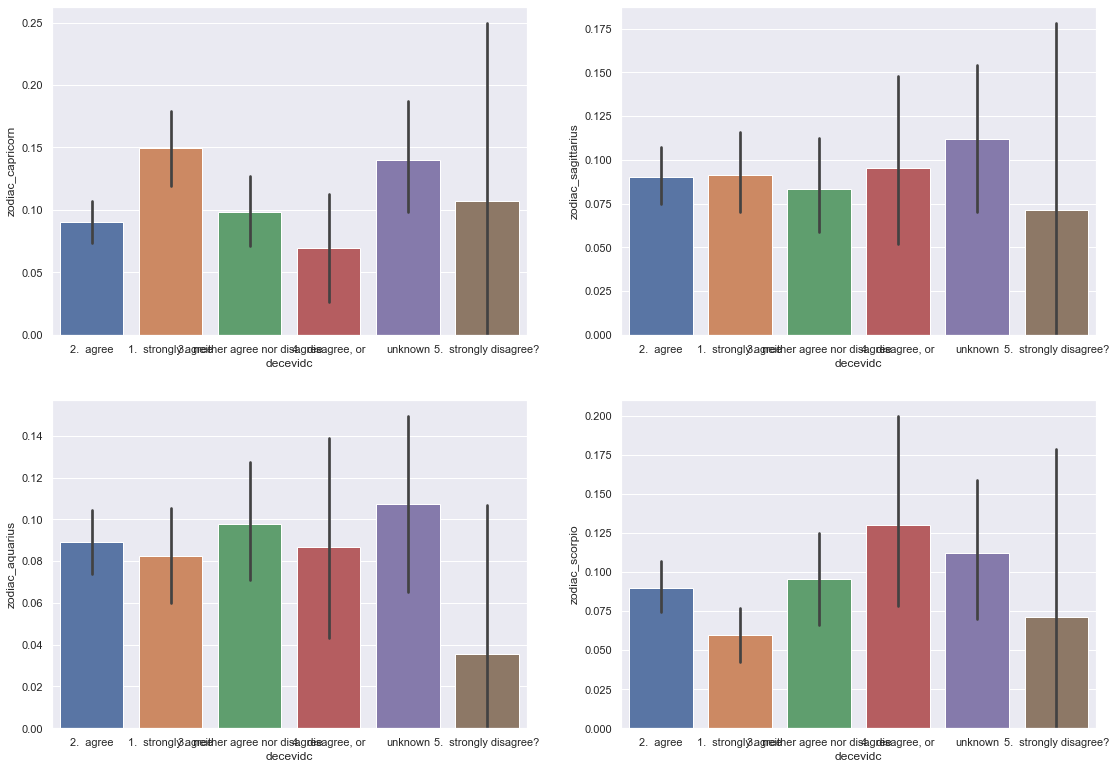

In [93]:
#define dimensions of subplots (rows, columns)
sns.set(rc={'figure.figsize':(18.7,13.27)})
fig, axes = plt.subplots(2, 2)
sns.set_theme(style="whitegrid")

#create chart in each subplot

sns.barplot( data= train, x='decevidc', y="zodiac_capricorn", ax=axes[0,0])
sns.barplot(data=train, x='decevidc', y='zodiac_sagittarius', ax=axes[0,1])
sns.barplot(data=train, x='decevidc', y='zodiac_aquarius', ax=axes[1,0])
sns.barplot(data=train, x='decevidc', y='zodiac_scorpio', ax=axes[1,1])

<AxesSubplot:xlabel='decevidc', ylabel='zodiac_libra'>

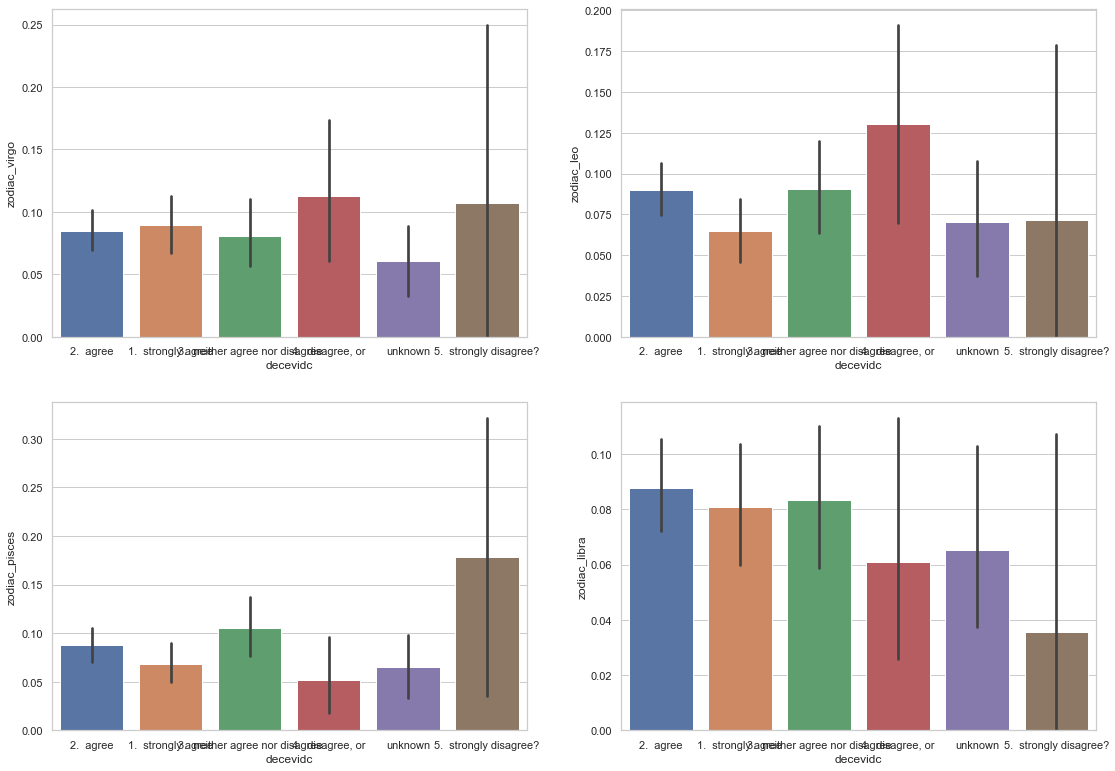

In [94]:
fig, axes = plt.subplots(2, 2)
sns.set_theme(style="whitegrid")

#create chart in each subplot

sns.barplot(data=train, x='decevidc', y='zodiac_virgo', ax=axes[0,0])
sns.barplot(data=train, x='decevidc', y='zodiac_leo', ax=axes[0,1])
sns.barplot(data=train, x='decevidc', y='zodiac_pisces', ax=axes[1,0])
sns.barplot(data=train, x='decevidc', y='zodiac_libra', ax=axes[1,1])

<AxesSubplot:xlabel='decevidc', ylabel='zodiac_aries'>

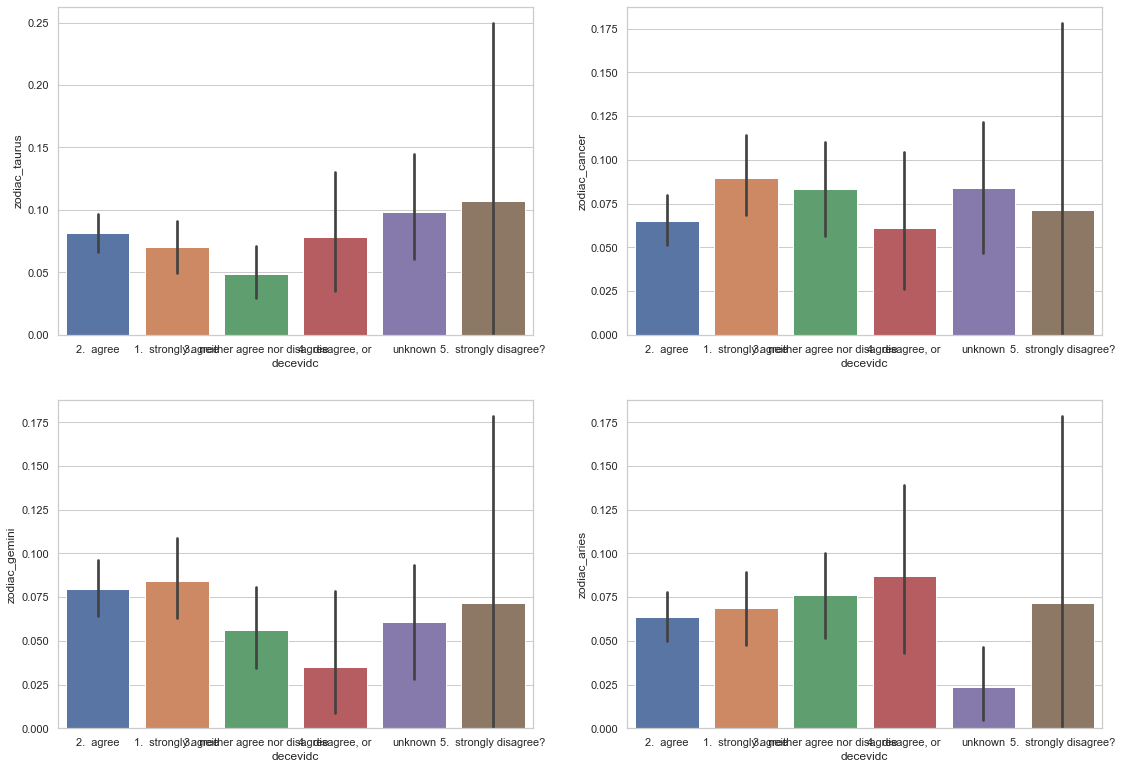

In [95]:
#define dimensions of subplots (rows, columns)
fig, axes = plt.subplots(2, 2)
sns.set_theme(style="whitegrid")

sns.barplot( data= train, x='decevidc', y="zodiac_taurus", ax=axes[0,0])
sns.barplot(data=train, x='decevidc', y='zodiac_cancer', ax=axes[0,1])
sns.barplot(data=train, x='decevidc', y='zodiac_gemini', ax=axes[1,0])
sns.barplot(data=train, x='decevidc', y='zodiac_aries', ax=axes[1,1])

## Bivariate Statistics: Comparing variables to target (Zodiac signs):

In [96]:
train.columns

Index(['zodiac', 'race', 'age', 'sex', 'sexornt', 'marital', 'res16', 'reg16',
       'degree', 'income', 'wrkslf', 'satjob', 'occ10', 'partyid', 'if16who',
       'polviews', 'gunlaw', 'grassv', 'relig', 'postlifev', 'postlifenv',
       'sprtprsn', 'sprtconnct', 'sprtlrgr', 'sprtpurp', 'happy', 'life',
       'obey', 'popular', 'thnkself', 'workhard', 'helpoth', 'grtwrks',
       'freemind', 'decevidc', 'advfmsci', 'mditate1', 'health', 'hlthphys',
       'hlthmntl', 'enjoynat', 'eatmeat', 'recycle', 'nobuygrn', 'fairv',
       'fairnv', 'helpfulv', 'helpfulnv', 'trustv', 'trustnv', 'conmedic',
       'contv', 'conpress', 'consci', 'conjudge', 'conlegis', 'socbar',
       'socrel', 'socommun', 'socfrend', 'satsoc', 'class', 'satfin',
       'quallife', 'partners', 'partnrs5', 'zodiac_num', 'sex_female',
       'sex_male', 'sex_unknown', 'race_black', 'race_other', 'race_unknown',
       'race_white', 'degree_associate/junior college', 'degree_bachelor's',
       'degree_graduate', 'd

In [106]:
#function (made by Stephen Fitzsimon), to run variables against target by zodiac sub categories
def chi_square_mass_test(df, cat_cols, target_col = 'target_outcome', alpha=0.05):
    """
    Performs a chi square test for all the aubcategories pass to cat_cols against the
    target_col
    """
    outputs = []
    for cat in cat_cols:
        for subcat in list(df[cat].unique()):
            for target_col_subcat in list(df[target_col].unique()):
                #get the crosstab between the two variables
                observed = pd.crosstab(df[target_col]==target_col_subcat, df[cat]==subcat)
                #calculate the statistic
                chi2, p, degf, expected = stats.chi2_contingency(observed)
                #save the calculation
                output = {
                        'target_column':target_col,
                        'column':cat,
                        'target_col_subcat':target_col_subcat,
                        'column_subcat':subcat,
                        'null_hypothesis':f"{target_col_subcat} independent of {subcat}",
                        'chi2':chi2,
                        'p':p,
                        'reject_null':p < alpha
                }
                outputs.append(output)
    #return the dataframe
    return pd.DataFrame(outputs)


#### Statistical tests on Demographics:

In [98]:
#by race
chi_square_mass_test(train, cat_cols=['race'],target_col="zodiac")

,target_column,column,target_col_subcat,column_subcat,null_hypothesis,chi2,p,reject_null
0,zodiac,race,libra,white,libra independent of white,0.06,0.81,False
1,zodiac,race,sagittarius,white,sagittarius independent of white,2.12,0.15,False
2,zodiac,race,virgo,white,virgo independent of white,0.30,0.58,False
3,zodiac,race,scorpio,white,scorpio independent of white,0.15,0.69,False
4,zodiac,race,pisces,white,pisces independent of white,1.29,0.26,False
5,zodiac,race,taurus,white,taurus independent of white,0.88,0.35,False
6,zodiac,race,aries,white,aries independent of white,6.47,0.01,True
7,zodiac,race,capricorn,white,capricorn independent of white,13.72,0.00,True
8,zodiac,race,leo,white,leo independent of white,0.26,0.61,False
9,zodiac,race,aquarius,white,aquarius independent of white,1.83,0.18,False


#### This seems highly unlikely. I'll do a value count below to look at this variable:

In [99]:
#looking at race:
train.race.value_counts()

white      1949
black       289
other       231
unknown      30
Name: race, dtype: int64

Yes, the data here is drastically varied between each race. I think this might be the reasoning that the stats results believe that this is a predictor.

In [100]:
#looking at age:
chi_square_mass_test(train, cat_cols=['age'],target_col="zodiac")

,target_column,column,target_col_subcat,column_subcat,null_hypothesis,chi2,p,reject_null
0,zodiac,age,libra,"(36.0, 45.0]","libra independent of (36.0, 45.0]",2.00,0.16,False
1,zodiac,age,sagittarius,"(36.0, 45.0]","sagittarius independent of (36.0, 45.0]",0.02,0.89,False
2,zodiac,age,virgo,"(36.0, 45.0]","virgo independent of (36.0, 45.0]",0.71,0.40,False
3,zodiac,age,scorpio,"(36.0, 45.0]","scorpio independent of (36.0, 45.0]",0.42,0.51,False
4,zodiac,age,pisces,"(36.0, 45.0]","pisces independent of (36.0, 45.0]",0.31,0.58,False
...,...,...,...,...,...,...,...,...
91,zodiac,age,capricorn,"(18.0, 27.0]","capricorn independent of (18.0, 27.0]",0.00,0.95,False
92,zodiac,age,leo,"(18.0, 27.0]","leo independent of (18.0, 27.0]",3.00,0.08,False
93,zodiac,age,aquarius,"(18.0, 27.0]","aquarius independent of (18.0, 27.0]",0.65,0.42,False
94,zodiac,age,gemini,"(18.0, 27.0]","gemini independent of (18.0, 27.0]",0.00,0.96,False


In [101]:
#looking at sexual orientation:
chi_square_mass_test(train, cat_cols=['sexornt'],target_col="zodiac")

,target_column,column,target_col_subcat,column_subcat,null_hypothesis,chi2,p,reject_null
0,zodiac,sexornt,libra,heterosexual or straight,libra independent of heterosexual or straight,0.33,0.57,False
1,zodiac,sexornt,sagittarius,heterosexual or straight,sagittarius independent of heterosexual or str...,0.99,0.32,False
2,zodiac,sexornt,virgo,heterosexual or straight,virgo independent of heterosexual or straight,0.00,0.95,False
3,zodiac,sexornt,scorpio,heterosexual or straight,scorpio independent of heterosexual or straight,0.03,0.86,False
4,zodiac,sexornt,pisces,heterosexual or straight,pisces independent of heterosexual or straight,7.74,0.01,True
5,zodiac,sexornt,taurus,heterosexual or straight,taurus independent of heterosexual or straight,3.58,0.06,False
6,zodiac,sexornt,aries,heterosexual or straight,aries independent of heterosexual or straight,0.27,0.60,False
7,zodiac,sexornt,capricorn,heterosexual or straight,capricorn independent of heterosexual or straight,6.97,0.01,True
8,zodiac,sexornt,leo,heterosexual or straight,leo independent of heterosexual or straight,0.00,1.00,False
9,zodiac,sexornt,aquarius,heterosexual or straight,aquarius independent of heterosexual or straight,0.24,0.62,False


#### Statistical tests on Relationships:

In [102]:
#looking at marital status:
chi_square_test(train.zodiac, train.marital, alpha = 0.05)

NameError: name 'chi_square_test' is not defined

In [103]:
#looking at subcategories
chi_square_mass_test(train, cat_cols=['marital'],target_col="zodiac")

,target_column,column,target_col_subcat,column_subcat,null_hypothesis,chi2,p,reject_null
0,zodiac,marital,libra,married,libra independent of married,3.89,0.05,True
1,zodiac,marital,sagittarius,married,sagittarius independent of married,0.88,0.35,False
2,zodiac,marital,virgo,married,virgo independent of married,0.24,0.62,False
3,zodiac,marital,scorpio,married,scorpio independent of married,0.01,0.90,False
4,zodiac,marital,pisces,married,pisces independent of married,1.32,0.25,False
...,...,...,...,...,...,...,...,...
67,zodiac,marital,capricorn,unknown,capricorn independent of unknown,0.00,1.00,False
68,zodiac,marital,leo,unknown,leo independent of unknown,0.00,1.00,False
69,zodiac,marital,aquarius,unknown,aquarius independent of unknown,0.00,1.00,False
70,zodiac,marital,gemini,unknown,gemini independent of unknown,0.00,1.00,False


In [104]:
#looking at sexual partners in past year:
chi_square_mass_test(train, cat_cols=['partners'],target_col="zodiac")

,target_column,column,target_col_subcat,column_subcat,null_hypothesis,chi2,p,reject_null
0,zodiac,partners,libra,1 partner,libra independent of 1 partner,0.45,0.50,False
1,zodiac,partners,sagittarius,1 partner,sagittarius independent of 1 partner,1.61,0.20,False
2,zodiac,partners,virgo,1 partner,virgo independent of 1 partner,0.12,0.73,False
3,zodiac,partners,scorpio,1 partner,scorpio independent of 1 partner,1.14,0.28,False
4,zodiac,partners,pisces,1 partner,pisces independent of 1 partner,0.94,0.33,False
...,...,...,...,...,...,...,...,...
115,zodiac,partners,capricorn,11-20 partners,capricorn independent of 11-20 partners,0.00,1.00,False
116,zodiac,partners,leo,11-20 partners,leo independent of 11-20 partners,0.00,1.00,False
117,zodiac,partners,aquarius,11-20 partners,aquarius independent of 11-20 partners,0.00,1.00,False
118,zodiac,partners,gemini,11-20 partners,gemini independent of 11-20 partners,0.00,1.00,False


In [ ]:
#looking at sexual partners in past 5 years:
chi_square_mass_test(train, cat_cols=['partnrs5'],target_col="zodiac")

#### Statistical tests on Political stance and viewpoints:

In [107]:
#looking at Political party
chi_square_mass_test(train, cat_cols=['partyid'],target_col="zodiac")

,target_column,column,target_col_subcat,column_subcat,null_hypothesis,chi2,p,reject_null
0,zodiac,partyid,libra,not very strong democrat,libra independent of not very strong democrat,0.01,0.93,False
1,zodiac,partyid,sagittarius,not very strong democrat,sagittarius independent of not very strong dem...,0.13,0.72,False
2,zodiac,partyid,virgo,not very strong democrat,virgo independent of not very strong democrat,0.51,0.48,False
3,zodiac,partyid,scorpio,not very strong democrat,scorpio independent of not very strong democrat,2.33,0.13,False
4,zodiac,partyid,pisces,not very strong democrat,pisces independent of not very strong democrat,1.03,0.31,False
...,...,...,...,...,...,...,...,...
103,zodiac,partyid,capricorn,unknown,capricorn independent of unknown,0.00,1.00,False
104,zodiac,partyid,leo,unknown,leo independent of unknown,0.00,1.00,False
105,zodiac,partyid,aquarius,unknown,aquarius independent of unknown,0.00,1.00,False
106,zodiac,partyid,gemini,unknown,gemini independent of unknown,0.00,1.00,False


In [108]:
#looking at political viewpoints
chi_square_mass_test(train, cat_cols=['polviews'],target_col="zodiac")

,target_column,column,target_col_subcat,column_subcat,null_hypothesis,chi2,p,reject_null
0,zodiac,polviews,libra,slightly liberal,libra independent of slightly liberal,1.18,0.28,False
1,zodiac,polviews,sagittarius,slightly liberal,sagittarius independent of slightly liberal,2.76,0.10,False
2,zodiac,polviews,virgo,slightly liberal,virgo independent of slightly liberal,0.00,1.00,False
3,zodiac,polviews,scorpio,slightly liberal,scorpio independent of slightly liberal,2.07,0.15,False
4,zodiac,polviews,pisces,slightly liberal,pisces independent of slightly liberal,6.90,0.01,True
...,...,...,...,...,...,...,...,...
91,zodiac,polviews,capricorn,unknown,capricorn independent of unknown,2.56,0.11,False
92,zodiac,polviews,leo,unknown,leo independent of unknown,0.02,0.88,False
93,zodiac,polviews,aquarius,unknown,aquarius independent of unknown,0.40,0.53,False
94,zodiac,polviews,gemini,unknown,gemini independent of unknown,0.15,0.70,False


In [ ]:
#looking at who they voted for president in 2016:
chi_square_mass_test(train, cat_cols=['if16who'],target_col="zodiac")

In [109]:
#looking at views on gunlaws
chi_square_mass_test(train, cat_cols=['gunlaw'],target_col="zodiac")

,target_column,column,target_col_subcat,column_subcat,null_hypothesis,chi2,p,reject_null
0,zodiac,gunlaw,libra,favor,libra independent of favor,0.77,0.38,False
1,zodiac,gunlaw,sagittarius,favor,sagittarius independent of favor,0.04,0.85,False
2,zodiac,gunlaw,virgo,favor,virgo independent of favor,0.21,0.65,False
3,zodiac,gunlaw,scorpio,favor,scorpio independent of favor,0.12,0.73,False
4,zodiac,gunlaw,pisces,favor,pisces independent of favor,0.59,0.44,False
5,zodiac,gunlaw,taurus,favor,taurus independent of favor,6.65,0.01,True
6,zodiac,gunlaw,aries,favor,aries independent of favor,0.00,1.00,False
7,zodiac,gunlaw,capricorn,favor,capricorn independent of favor,0.00,0.96,False
8,zodiac,gunlaw,leo,favor,leo independent of favor,1.62,0.20,False
9,zodiac,gunlaw,aquarius,favor,aquarius independent of favor,1.30,0.25,False


In [ ]:
#looking at views on legalization of marijuanan
chi_square_mass_test(train, cat_cols=['grassv'],target_col="zodiac")

In [ ]:
#looking at views of if Supreme court is trustworthy or not
chi_square_mass_test(train, cat_cols=['conjudge'],target_col="zodiac")

#### Statistical tests on Career:

In [110]:
#looking at income brackets
chi_square_mass_test(train, cat_cols=['income'],target_col="zodiac")

,target_column,column,target_col_subcat,column_subcat,null_hypothesis,chi2,p,reject_null
0,zodiac,income,libra,"$25,000 or more","libra independent of $25,000 or more",2.63,0.10,False
1,zodiac,income,sagittarius,"$25,000 or more","sagittarius independent of $25,000 or more",2.63,0.11,False
2,zodiac,income,virgo,"$25,000 or more","virgo independent of $25,000 or more",0.11,0.74,False
3,zodiac,income,scorpio,"$25,000 or more","scorpio independent of $25,000 or more",2.42,0.12,False
4,zodiac,income,pisces,"$25,000 or more","pisces independent of $25,000 or more",0.00,0.95,False
...,...,...,...,...,...,...,...,...
163,zodiac,income,capricorn,"$6,000 to $6,999","capricorn independent of $6,000 to $6,999",0.00,1.00,False
164,zodiac,income,leo,"$6,000 to $6,999","leo independent of $6,000 to $6,999",0.00,1.00,False
165,zodiac,income,aquarius,"$6,000 to $6,999","aquarius independent of $6,000 to $6,999",0.01,0.94,False
166,zodiac,income,gemini,"$6,000 to $6,999","gemini independent of $6,000 to $6,999",0.00,1.00,False


In [111]:
#looking at working for self or not:
chi_square_mass_test(train, cat_cols=['wrkslf'],target_col="zodiac")

,target_column,column,target_col_subcat,column_subcat,null_hypothesis,chi2,p,reject_null
0,zodiac,wrkslf,libra,someone else,libra independent of someone else,0.04,0.85,False
1,zodiac,wrkslf,sagittarius,someone else,sagittarius independent of someone else,0.79,0.37,False
2,zodiac,wrkslf,virgo,someone else,virgo independent of someone else,2.87,0.09,False
3,zodiac,wrkslf,scorpio,someone else,scorpio independent of someone else,0.42,0.52,False
4,zodiac,wrkslf,pisces,someone else,pisces independent of someone else,0.00,1.00,False
5,zodiac,wrkslf,taurus,someone else,taurus independent of someone else,0.38,0.54,False
6,zodiac,wrkslf,aries,someone else,aries independent of someone else,2.66,0.10,False
7,zodiac,wrkslf,capricorn,someone else,capricorn independent of someone else,0.71,0.40,False
8,zodiac,wrkslf,leo,someone else,leo independent of someone else,1.52,0.22,False
9,zodiac,wrkslf,aquarius,someone else,aquarius independent of someone else,1.01,0.32,False


In [113]:
#occupation industry/title:
chi_square_mass_test(train, cat_cols=['occ10'],target_col="zodiac")

,target_column,column,target_col_subcat,column_subcat,null_hypothesis,chi2,p,reject_null
0,zodiac,occ10,libra,"library assistants, clerical","libra independent of library assistants, clerical",2.34,0.13,False
1,zodiac,occ10,sagittarius,"library assistants, clerical","sagittarius independent of library assistants,...",0.00,1.00,False
2,zodiac,occ10,virgo,"library assistants, clerical","virgo independent of library assistants, clerical",0.00,1.00,False
3,zodiac,occ10,scorpio,"library assistants, clerical","scorpio independent of library assistants, cle...",0.00,1.00,False
4,zodiac,occ10,pisces,"library assistants, clerical","pisces independent of library assistants, cler...",0.00,1.00,False
...,...,...,...,...,...,...,...,...
4303,zodiac,occ10,capricorn,dentists,capricorn independent of dentists,0.00,1.00,False
4304,zodiac,occ10,leo,dentists,leo independent of dentists,0.00,1.00,False
4305,zodiac,occ10,aquarius,dentists,aquarius independent of dentists,0.00,1.00,False
4306,zodiac,occ10,gemini,dentists,gemini independent of dentists,0.00,1.00,False


In [114]:
#Job satisfaction:
chi_square_mass_test(train, cat_cols=['satjob'],target_col="zodiac")

,target_column,column,target_col_subcat,column_subcat,null_hypothesis,chi2,p,reject_null
0,zodiac,satjob,libra,very satisfied,libra independent of very satisfied,1.05,0.31,False
1,zodiac,satjob,sagittarius,very satisfied,sagittarius independent of very satisfied,0.35,0.55,False
2,zodiac,satjob,virgo,very satisfied,virgo independent of very satisfied,1.95,0.16,False
3,zodiac,satjob,scorpio,very satisfied,scorpio independent of very satisfied,0.35,0.56,False
4,zodiac,satjob,pisces,very satisfied,pisces independent of very satisfied,0.00,0.99,False
5,zodiac,satjob,taurus,very satisfied,taurus independent of very satisfied,0.00,0.94,False
6,zodiac,satjob,aries,very satisfied,aries independent of very satisfied,0.85,0.36,False
7,zodiac,satjob,capricorn,very satisfied,capricorn independent of very satisfied,0.28,0.60,False
8,zodiac,satjob,leo,very satisfied,leo independent of very satisfied,0.01,0.92,False
9,zodiac,satjob,aquarius,very satisfied,aquarius independent of very satisfied,0.00,1.00,False


#### Statistical tests on Religion and Spirituality:

In [112]:
#looking at religious affiliation
chi_square_mass_test(train, cat_cols=['relig'],target_col="zodiac")

,target_column,column,target_col_subcat,column_subcat,null_hypothesis,chi2,p,reject_null
0,zodiac,relig,libra,catholic,libra independent of catholic,0.13,0.71,False
1,zodiac,relig,sagittarius,catholic,sagittarius independent of catholic,0.11,0.74,False
2,zodiac,relig,virgo,catholic,virgo independent of catholic,0.02,0.90,False
3,zodiac,relig,scorpio,catholic,scorpio independent of catholic,0.24,0.62,False
4,zodiac,relig,pisces,catholic,pisces independent of catholic,0.49,0.48,False
...,...,...,...,...,...,...,...,...
163,zodiac,relig,capricorn,inter-nondenominational,capricorn independent of inter-nondenominational,0.00,1.00,False
164,zodiac,relig,leo,inter-nondenominational,leo independent of inter-nondenominational,0.00,1.00,False
165,zodiac,relig,aquarius,inter-nondenominational,aquarius independent of inter-nondenominational,0.00,1.00,False
166,zodiac,relig,gemini,inter-nondenominational,gemini independent of inter-nondenominational,0.00,1.00,False


In [ ]:
train.postlifev.value_counts()

In [115]:
#looking at life afterdeath views/beliefs:
chi_square_mass_test(train, cat_cols=['postlifev'],target_col="zodiac")

,target_column,column,target_col_subcat,column_subcat,null_hypothesis,chi2,p,reject_null
0,zodiac,postlifev,libra,yes,libra independent of yes,0.00,0.94,False
1,zodiac,postlifev,sagittarius,yes,sagittarius independent of yes,0.17,0.68,False
2,zodiac,postlifev,virgo,yes,virgo independent of yes,0.02,0.88,False
3,zodiac,postlifev,scorpio,yes,scorpio independent of yes,0.00,1.00,False
4,zodiac,postlifev,pisces,yes,pisces independent of yes,0.02,0.88,False
5,zodiac,postlifev,taurus,yes,taurus independent of yes,1.43,0.23,False
6,zodiac,postlifev,aries,yes,aries independent of yes,0.89,0.34,False
7,zodiac,postlifev,capricorn,yes,capricorn independent of yes,0.38,0.54,False
8,zodiac,postlifev,leo,yes,leo independent of yes,1.09,0.30,False
9,zodiac,postlifev,aquarius,yes,aquarius independent of yes,0.00,1.00,False


In [116]:
#looking at self perspective on being a spiritual person
chi_square_mass_test(train, cat_cols=['sprtprsn'],target_col="zodiac")

,target_column,column,target_col_subcat,column_subcat,null_hypothesis,chi2,p,reject_null
0,zodiac,sprtprsn,libra,unknown,libra independent of unknown,0.00,1.00,False
1,zodiac,sprtprsn,sagittarius,unknown,sagittarius independent of unknown,0.13,0.71,False
2,zodiac,sprtprsn,virgo,unknown,virgo independent of unknown,0.00,1.00,False
3,zodiac,sprtprsn,scorpio,unknown,scorpio independent of unknown,1.17,0.28,False
4,zodiac,sprtprsn,pisces,unknown,pisces independent of unknown,0.07,0.79,False
5,zodiac,sprtprsn,taurus,unknown,taurus independent of unknown,0.00,1.00,False
6,zodiac,sprtprsn,aries,unknown,aries independent of unknown,0.00,1.00,False
7,zodiac,sprtprsn,capricorn,unknown,capricorn independent of unknown,0.00,1.00,False
8,zodiac,sprtprsn,leo,unknown,leo independent of unknown,0.00,1.00,False
9,zodiac,sprtprsn,aquarius,unknown,aquarius independent of unknown,0.13,0.72,False


In [117]:
#looking at overall happiness with life
chi_square_mass_test(train, cat_cols=['happy'],target_col="zodiac")

,target_column,column,target_col_subcat,column_subcat,null_hypothesis,chi2,p,reject_null
0,zodiac,happy,libra,pretty happy,libra independent of pretty happy,1.05,0.31,False
1,zodiac,happy,sagittarius,pretty happy,sagittarius independent of pretty happy,0.00,1.00,False
2,zodiac,happy,virgo,pretty happy,virgo independent of pretty happy,3.21,0.07,False
3,zodiac,happy,scorpio,pretty happy,scorpio independent of pretty happy,0.06,0.81,False
4,zodiac,happy,pisces,pretty happy,pisces independent of pretty happy,2.55,0.11,False
5,zodiac,happy,taurus,pretty happy,taurus independent of pretty happy,1.53,0.22,False
6,zodiac,happy,aries,pretty happy,aries independent of pretty happy,0.06,0.80,False
7,zodiac,happy,capricorn,pretty happy,capricorn independent of pretty happy,0.49,0.49,False
8,zodiac,happy,leo,pretty happy,leo independent of pretty happy,3.01,0.08,False
9,zodiac,happy,aquarius,pretty happy,aquarius independent of pretty happy,0.51,0.47,False


In [118]:
#looking at how much they enjoy life:
chi_square_mass_test(train, cat_cols=['life'],target_col="zodiac")

,target_column,column,target_col_subcat,column_subcat,null_hypothesis,chi2,p,reject_null
0,zodiac,life,libra,unknown,libra independent of unknown,0.18,0.67,False
1,zodiac,life,sagittarius,unknown,sagittarius independent of unknown,0.67,0.41,False
2,zodiac,life,virgo,unknown,virgo independent of unknown,0.02,0.89,False
3,zodiac,life,scorpio,unknown,scorpio independent of unknown,1.94,0.16,False
4,zodiac,life,pisces,unknown,pisces independent of unknown,0.00,0.99,False
5,zodiac,life,taurus,unknown,taurus independent of unknown,1.16,0.28,False
6,zodiac,life,aries,unknown,aries independent of unknown,2.12,0.15,False
7,zodiac,life,capricorn,unknown,capricorn independent of unknown,1.88,0.17,False
8,zodiac,life,leo,unknown,leo independent of unknown,0.49,0.48,False
9,zodiac,life,aquarius,unknown,aquarius independent of unknown,0.06,0.81,False


In [119]:
#looking at how often participant has moments of spiritual connections
chi_square_mass_test(train, cat_cols=['sprtconnct'],target_col="zodiac")

,target_column,column,target_col_subcat,column_subcat,null_hypothesis,chi2,p,reject_null
0,zodiac,sprtconnct,libra,once or twice a week,libra independent of once or twice a week,0.19,0.67,False
1,zodiac,sprtconnct,sagittarius,once or twice a week,sagittarius independent of once or twice a week,0.05,0.82,False
2,zodiac,sprtconnct,virgo,once or twice a week,virgo independent of once or twice a week,0.18,0.67,False
3,zodiac,sprtconnct,scorpio,once or twice a week,scorpio independent of once or twice a week,0.39,0.53,False
4,zodiac,sprtconnct,pisces,once or twice a week,pisces independent of once or twice a week,0.89,0.35,False
...,...,...,...,...,...,...,...,...
91,zodiac,sprtconnct,capricorn,once a year or less,capricorn independent of once a year or less,0.00,0.98,False
92,zodiac,sprtconnct,leo,once a year or less,leo independent of once a year or less,2.26,0.13,False
93,zodiac,sprtconnct,aquarius,once a year or less,aquarius independent of once a year or less,6.79,0.01,True
94,zodiac,sprtconnct,gemini,once a year or less,gemini independent of once a year or less,0.17,0.68,False


In [ ]:
#how true they feel at times that there is something larger than life
chi_square_mass_test(train, cat_cols=['sprtlrgr'],target_col="zodiac")

In [ ]:
#how true/often they feel that there is a spiritual purpose
chi_square_mass_test(train, cat_cols=['sprtpurp'],target_col="zodiac")

#### Statistical tests on Health:

In [ ]:
#looking at overall health rating
chi_square_mass_test(train, cat_cols=['health'],target_col="zodiac")

In [ ]:
#looking at physical health rating
chi_square_mass_test(train, cat_cols=['hlthphys'],target_col="zodiac")

In [ ]:
#looking at mental health rating
chi_square_mass_test(train, cat_cols=['hlthmntl'],target_col="zodiac")

In [ ]:
chi_square_test(train.zodiac, train.hlthmntl, alpha = 0.05)

### Interesting. Let's look at value counts:

In [ ]:
train.hlthmntl.value_counts()

### Takeaway..ok. Possible driver?

#### Statistical tests on View of Others:

In [ ]:
#How participant feels about others being fair
chi_square_test(train.zodiac, train.fairv, alpha = 0.05)

In [ ]:
chi_square_mass_test(train, cat_cols=['fairv'],target_col="zodiac")

In [ ]:
#How participant feels about others being fair
chi_square_test(train.zodiac, train.fairv, alpha = 0.05)

In [ ]:
#Opinion of others being helpful
chi_square_mass_test(train, cat_cols=['helpfulv'],target_col="zodiac")

In [ ]:
#Opinion of others being fair:
chi_square_mass_test(train, cat_cols=['fairv'],target_col="zodiac")

In [ ]:
#Opinion of Trusting medical opinions
chi_square_test(train.zodiac, train.conmedic, alpha = 0.05)

In [ ]:
chi_square_mass_test(train, cat_cols=['conmedic'],target_col="zodiac")

In [ ]:
#Opinion that TV is trustworthy
chi_square_test(train.zodiac, train.contv, alpha = 0.05)

In [ ]:
chi_square_mass_test(train, cat_cols=['contv'],target_col="zodiac")

In [ ]:
#Opinion that Press is trustworthy
chi_square_test(train.zodiac, train.conpress, alpha = 0.05)

In [ ]:
chi_square_mass_test(train, cat_cols=['conpress'],target_col="zodiac")

In [ ]:
#Opinion that Science is trustworthy:
chi_square_mass_test(train, cat_cols=['consci'],target_col="zodiac")

In [ ]:
#Opinion that Legal system is trustworthy:
chi_square_mass_test(train, cat_cols=['conlegis'],target_col="zodiac")

In [ ]:
chi_square_test(train.zodiac, train.conlegis, alpha = 0.05)

In [ ]:
#Opinion that Obeying others is most important life lesson:
chi_square_mass_test(train, cat_cols=['obey'],target_col="zodiac")

In [ ]:
#Opinion that being popular is most important life lesson:
chi_square_mass_test(train, cat_cols=['popular'],target_col="zodiac")

In [ ]:
#Opinion that learning to think for self is most important life lesson:
chi_square_mass_test(train, cat_cols=['thnkself'],target_col="zodiac")

In [ ]:
#Opinion that TV is trustworthy
chi_square_test(train.zodiac, train.thnkself, alpha = 0.05)

In [ ]:
#Opinion that learning to work hard is most important life lesson:
chi_square_mass_test(train, cat_cols=['workhard'],target_col="zodiac")

In [ ]:
chi_square_test(train.zodiac, train.workhard, alpha = 0.05)

#### Let's look at the value counts:

In [ ]:
train.workhard.value_counts()

In [ ]:
#Opinion that learning to work hard is most important life lesson:
chi_square_mass_test(train, cat_cols=['helpoth'],target_col="zodiac")

In [ ]:
chi_square_test(train.zodiac, train.helpoth, alpha = 0.05)

### Social statistical testing:

In [ ]:
#How often participant hangs out at social bars
chi_square_test(train.zodiac, train.socbar, alpha = 0.05)

In [ ]:
#How often participant hangs out with family
chi_square_test(train.zodiac, train.socrel, alpha = 0.05)

In [105]:
#How often participant hangs out with community
chi_square_test(train.zodiac, train.socommun, alpha = 0.05)

NameError: name 'chi_square_test' is not defined

In [ ]:
#How often participant hangs out with friends
chi_square_test(train.zodiac, train.socfrend, alpha = 0.05)

In [ ]:
#How satisfied socially are participants
chi_square_test(train.zodiac, train.satsoc, alpha = 0.05)

### Stats on other areas:

In [ ]:
#How satisfied financially
chi_square_test(train.zodiac, train.satfin, alpha = 0.05)

In [ ]:
#How they rate their quality of life
chi_square_test(train.zodiac, train.quallife, alpha = 0.05)

In [ ]:
#Do they enjoy nature?
chi_square_test(train.zodiac, train.enjoynat, alpha = 0.05)

In [ ]:
#Do they eat meat?
chi_square_test(train.zodiac, train.eatmeat, alpha = 0.05)

In [ ]:
#Do they recycle?
chi_square_test(train.zodiac, train.recycle, alpha = 0.05)

In [ ]:
#Do they recycle?
chi_square_test(train.zodiac, train.nobuygrn, alpha = 0.05)

In [ ]:
#Do they think greatworks in life are philosophy and science?
chi_square_test(train.zodiac, train.grtwrks, alpha = 0.05)

In [ ]:
#Do they think free mind comes from leaving old ways and traditions?
chi_square_test(train.zodiac, train.freemind, alpha = 0.05)

In [ ]:
#Do they live life by needing decisive evidence?
chi_square_test(train.zodiac, train.decevidc, alpha = 0.05)

In [ ]:
#Do they believe that science is what has advanced the world?
chi_square_test(train.zodiac, train.advfmsci, alpha = 0.05)

____________________________________________________

## Verifying chi^2 results of variables that rejected null:

Opinion of Working hard as life lesson:

In [ ]:
# The above visual is quite clear, but if it was less clear or we want more certainty, we'll run a hypothesis test
# Let's run a chi squared to compare proportions, to have more confidence
alpha = 0.05
null_hypothesis = "Opinion of hard work is indepedant of zodiac sign"
alternative_hypothesis = "there is a relationship between work hard opinion and zodiac sign"

# Setup a crosstab of observed survival to pclass
observed = pd.crosstab(train.zodiac, train.workhard)

chi2, p, degf, expected = stats.chi2_contingency(observed)

if p < alpha:
    print("Reject the null hypothesis that", null_hypothesis)
    print("Sufficient evidence to move forward understanding that", alternative_hypothesis)
else:
    print("Fail to reject the null")
    print("Insufficient evidence to reject the null")
p


        


Mental Health rating:

In [ ]:
# The above visual is quite clear, but if it was less clear or we want more certainty, we'll run a hypothesis test
# Let's run a chi squared to compare proportions, to have more confidence
alpha = 0.05
null_hypothesis = "Mental Health rating is indepedant of zodiac sign"
alternative_hypothesis = "there is a relationship between mental health rating and zodiac sign"

# Setup a crosstab of observed survival to pclass
observed = pd.crosstab(train.zodiac, train.workhard)

chi2, p, degf, expected = stats.chi2_contingency(observed)

if p < alpha:
    print("Reject the null hypothesis that", null_hypothesis)
    print("Sufficient evidence to move forward understanding that", alternative_hypothesis)
else:
    print("Fail to reject the null")
    print("Insufficient evidence to reject the null")
p

How often participant spends time with family:

In [ ]:
# The above visual is quite clear, but if it was less clear or we want more certainty, we'll run a hypothesis test
# Let's run a chi squared to compare proportions, to have more confidence
alpha = 0.05
null_hypothesis = "Mental Health rating is indepedant of zodiac sign"
alternative_hypothesis = "there is a relationship between mental health rating and zodiac sign"

# Setup a crosstab of observed survival to pclass
observed = pd.crosstab(train.zodiac, train.socrel)

chi2, p, degf, expected = stats.chi2_contingency(observed)

if p < alpha:
    print("Reject the null hypothesis that", null_hypothesis)
    print("Sufficient evidence to move forward understanding that", alternative_hypothesis)
else:
    print("Fail to reject the null")
    print("Insufficient evidence to reject the null")
p

Does participant need evidence for decisions in life?

In [ ]:
# The above visual is quite clear, but if it was less clear or we want more certainty, we'll run a hypothesis test
# Let's run a chi squared to compare proportions, to have more confidence
alpha = 0.05
null_hypothesis = "Mental Health rating is indepedant of zodiac sign"
alternative_hypothesis = "there is a relationship between mental health rating and zodiac sign"

# Setup a crosstab of observed survival to pclass
observed = pd.crosstab(train.zodiac, train.decevidc)

chi2, p, degf, expected = stats.chi2_contingency(observed)

if p < alpha:
    print("Reject the null hypothesis that", null_hypothesis)
    print("Sufficient evidence to move forward understanding that", alternative_hypothesis)
else:
    print("Fail to reject the null")
    print("Insufficient evidence to reject the null")
p

__________________________________________________________________________________